In [1]:
import glob
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
#from scipy import interp
from sklearn.metrics import roc_auc_score
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import glob
import pandas as pd

# Get all CSV files from the folder
files = glob.glob("/content/drive/MyDrive/CICDDOS-2019/*.csv")

print("Files found:", len(files))
print(files)

if len(files) == 0:
    raise FileNotFoundError("❌ No CSV files found. Check folder path.")

# Merge all CSV files
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

df


Files found: 4
['/content/drive/MyDrive/CICDDOS-2019/f2.csv', '/content/drive/MyDrive/CICDDOS-2019/f4.csv', '/content/drive/MyDrive/CICDDOS-2019/f1.csv', '/content/drive/MyDrive/CICDDOS-2019/f3.csv']


Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
0            286951           660               229.0                   229.0   
1            120152           858               229.0                   229.0   
2            443287           593               229.0                   229.0   
3            464880           648               229.0                   229.0   
4            413201           931               229.0                   229.0   
...             ...           ...                 ...                     ...   
2515494      677847         62535               516.0                   516.0   
2515495      677848         62587               516.0                   516.0   
2515496      677849         62474               516.0                   516.0   
2515497      677850         62468               516.0                   516.0   
2515498      677851         62466               516.0                   516.0   

         Flow ID   Packet Length Mean   Fwd Packet Length Max  \
0         357693                229.0                   229.0   
1         740001                229.0                   229.0   
2         187142                229.0                   229.0   
3         308905                229.0                   229.0   
4         866129                229.0                   229.0   
...          ...                  ...                     ...   
2515494   305543                516.0                   516.0   
2515495   319952                516.0                   516.0   
2515496   273029                516.0                   516.0   
2515497   263806                516.0                   516.0   
2515498   249982                516.0                   516.0   

          Average Packet Size   ACK Flag Count   Avg Fwd Segment Size  ...  \
0                       343.5                0                  229.0  ...   
1                       343.5                0                  229.0  ...   
2                       343.5                0                  229.0  ...   
3                       343.5                0                  229.0  ...   
4                       343.5                0                  229.0  ...   
...                       ...              ...                    ...  ...   
2515494                 645.0                0                  516.0  ...   
2515495                 645.0                0                  516.0  ...   
2515496                 774.0                0                  516.0  ...   
2515497                 645.0                0                  516.0  ...   
2515498                 645.0                0                  516.0  ...   

         Flow Bytes/s   Max Packet Length   Protocol  Fwd Packets/s  \
0        4.580000e+08               229.0         17   2.000000e+06   
1        2.290000e+08               229.0         17   1.000000e+06   
2        9.541667e+06               229.0         17   4.166667e+04   
3        4.580000e+08               229.0         17   2.000000e+06   
4        9.541667e+06               229.0         17   4.166667e+04   
...               ...                 ...        ...            ...   
2515494  6.879963e+02               516.0         17   1.333326e+00   
2515495  6.880069e+02               516.0         17   1.333347e+00   
2515496  5.160000e+08               516.0         17   1.000000e+06   
2515497  6.879858e+02               516.0         17   1.333306e+00   
2515498  6.879872e+02               516.0         17   1.333308e+00   

          Flow Packets/s  Total Length of Fwd Packets   Subflow Fwd Bytes  \
0           2.000000e+06                        458.0                 458   
1           1.000000e+06                        458.0                 458   
2           4.166667e+04                        458.0                 458   
3           2.000000e+06                        458.0                 458   
4           4.166667e+04                        458.0                 458   
... 

In [4]:
df.dtypes

Timestamp                       int64
 Source Port                     int64
 Min Packet Length             float64
 Fwd Packet Length Min         float64
Flow ID                          int64
 Packet Length Mean            float64
 Fwd Packet Length Max         float64
 Average Packet Size           float64
 ACK Flag Count                  int64
 Avg Fwd Segment Size          float64
 Fwd Packet Length Mean        float64
Flow Bytes/s                   float64
 Max Packet Length             float64
 Protocol                        int64
Fwd Packets/s                  float64
 Flow Packets/s                float64
Total Length of Fwd Packets    float64
 Subflow Fwd Bytes               int64
 Destination Port                int64
 act_data_pkt_fwd                int64
 Label                          object
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for column in df.columns:
    # Check if the column dtype is 'object'
    if df[column].dtype == 'object':
        # Encode the values of the column and replace them in the DataFrame
        df[column] = label_encoder.fit_transform(df[column])

# Now all object columns are encoded as integers


In [6]:
df.dtypes

Timestamp                       int64
 Source Port                     int64
 Min Packet Length             float64
 Fwd Packet Length Min         float64
Flow ID                          int64
 Packet Length Mean            float64
 Fwd Packet Length Max         float64
 Average Packet Size           float64
 ACK Flag Count                  int64
 Avg Fwd Segment Size          float64
 Fwd Packet Length Mean        float64
Flow Bytes/s                   float64
 Max Packet Length             float64
 Protocol                        int64
Fwd Packets/s                  float64
 Flow Packets/s                float64
Total Length of Fwd Packets    float64
 Subflow Fwd Bytes               int64
 Destination Port                int64
 act_data_pkt_fwd                int64
 Label                           int64
dtype: object

In [7]:
df.head()

Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
0      286951           660               229.0                   229.0   
1      120152           858               229.0                   229.0   
2      443287           593               229.0                   229.0   
3      464880           648               229.0                   229.0   
4      413201           931               229.0                   229.0   

   Flow ID   Packet Length Mean   Fwd Packet Length Max   Average Packet Size  \
0   357693                229.0                   229.0                 343.5   
1   740001                229.0                   229.0                 343.5   
2   187142                229.0                   229.0                 343.5   
3   308905                229.0                   229.0                 343.5   
4   866129                229.0                   229.0                 343.5   

    ACK Flag Count   Avg Fwd Segment Size  ...  Flow Bytes/s  \
0                0                  229.0  ...  4.580000e+08   
1                0                  229.0  ...  2.290000e+08   
2                0                  229.0  ...  9.541667e+06   
3                0                  229.0  ...  4.580000e+08   
4                0                  229.0  ...  9.541667e+06   

    Max Packet Length   Protocol  Fwd Packets/s   Flow Packets/s  \
0               229.0         17   2.000000e+06     2.000000e+06   
1               229.0         17   1.000000e+06     1.000000e+06   
2               229.0         17   4.166667e+04     4.166667e+04   
3               229.0         17   2.000000e+06     2.000000e+06   
4               229.0         17   4.166667e+04     4.166667e+04   

   Total Length of Fwd Packets   Subflow Fwd Bytes   Destination Port  \
0                        458.0                 458              36967   
1                        458.0                 458              56327   
2                        458.0                 458               4928   
3                        458.0                 458              31629   
4                        458.0                 458              25819   

    act_data_pkt_fwd   Label  
0                  1       5  
1                  1       5  
2                  1       5  
3                  1       5  
4                  1       5  

[5 rows x 21 columns]

In [8]:
df.columns

Index([' Timestamp', ' Source Port', ' Min Packet Length',
       ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean',
       ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count',
       ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s',
       ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s',
       'Total Length of Fwd Packets', ' Subflow Fwd Bytes',
       ' Destination Port', ' act_data_pkt_fwd', ' Label'],
      dtype='object')

In [9]:
df.shape

(2515499, 21)

In [10]:
df.tail()

Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
2515494      677847         62535               516.0                   516.0   
2515495      677848         62587               516.0                   516.0   
2515496      677849         62474               516.0                   516.0   
2515497      677850         62468               516.0                   516.0   
2515498      677851         62466               516.0                   516.0   

         Flow ID   Packet Length Mean   Fwd Packet Length Max  \
2515494   305543                516.0                   516.0   
2515495   319952                516.0                   516.0   
2515496   273029                516.0                   516.0   
2515497   263806                516.0                   516.0   
2515498   249982                516.0                   516.0   

          Average Packet Size   ACK Flag Count   Avg Fwd Segment Size  ...  \
2515494                 645.0                0                  516.0  ...   
2515495                 645.0                0                  516.0  ...   
2515496                 774.0                0                  516.0  ...   
2515497                 645.0                0                  516.0  ...   
2515498                 645.0                0                  516.0  ...   

         Flow Bytes/s   Max Packet Length   Protocol   Fwd Packets/s  \
2515494  6.879963e+02               516.0         17        1.333326   
2515495  6.880069e+02               516.0         17        1.333347   
2515496  5.160000e+08               516.0         17  1000000.000000   
2515497  6.879858e+02               516.0         17        1.333306   
2515498  6.879872e+02               516.0         17        1.333308   

          Flow Packets/s  Total Length of Fwd Packets   Subflow Fwd Bytes  \
2515494         1.333326                       2064.0                2064   
2515495         1.333347                       2064.0                2064   
2515496   1000000.000000                       1032.0                1032   
2515497         1.333306                       2064.0                2064   
2515498         1.333308                       2064.0                2064   

          Destination Port   act_data_pkt_fwd   Label  
2515494              19373                  3      10  
2515495              14160                  3      10  
2515496              27866                  1      10  
2515497              62947                  3      10  
2515498              59622                  3      10  

[5 rows x 21 columns]

In [6]:
# Assuming your original DataFrame is named 'original_df'
# You may already have this DataFrame populated from previous steps

# Drop missing values
df.dropna(inplace=True)

# Display the shape of the DataFrame after removing missing values
print("Shape of original_df after removing missing values:", df.shape)


Shape of original_df after removing missing values: (2515499, 21)


In [7]:
# Calculate the size of each chunk
chunk_size = len(df) // 4

# Divide the DataFrame into 4 chunks
df1 = df.iloc[:chunk_size]
df2 = df.iloc[chunk_size: 2 * chunk_size]
df3 = df.iloc[2 * chunk_size: 3 * chunk_size]
df4 = df.iloc[3 * chunk_size:]

# Display the shapes of each DataFrame
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)
print("Shape of df3:", df3.shape)
print("Shape of df4:", df4.shape)


Shape of df1: (628874, 21)
Shape of df2: (628874, 21)
Shape of df3: (628874, 21)
Shape of df4: (628877, 21)


In [13]:
df1.head()

Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
0      286951           660               229.0                   229.0   
1      120152           858               229.0                   229.0   
2      443287           593               229.0                   229.0   
3      464880           648               229.0                   229.0   
4      413201           931               229.0                   229.0   

   Flow ID   Packet Length Mean   Fwd Packet Length Max   Average Packet Size  \
0   357693                229.0                   229.0                 343.5   
1   740001                229.0                   229.0                 343.5   
2   187142                229.0                   229.0                 343.5   
3   308905                229.0                   229.0                 343.5   
4   866129                229.0                   229.0                 343.5   

    ACK Flag Count   Avg Fwd Segment Size  ...  Flow Bytes/s  \
0                0                  229.0  ...  4.580000e+08   
1                0                  229.0  ...  2.290000e+08   
2                0                  229.0  ...  9.541667e+06   
3                0                  229.0  ...  4.580000e+08   
4                0                  229.0  ...  9.541667e+06   

    Max Packet Length   Protocol  Fwd Packets/s   Flow Packets/s  \
0               229.0         17   2.000000e+06     2.000000e+06   
1               229.0         17   1.000000e+06     1.000000e+06   
2               229.0         17   4.166667e+04     4.166667e+04   
3               229.0         17   2.000000e+06     2.000000e+06   
4               229.0         17   4.166667e+04     4.166667e+04   

   Total Length of Fwd Packets   Subflow Fwd Bytes   Destination Port  \
0                        458.0                 458              36967   
1                        458.0                 458              56327   
2                        458.0                 458               4928   
3                        458.0                 458              31629   
4                        458.0                 458              25819   

    act_data_pkt_fwd   Label  
0                  1       5  
1                  1       5  
2                  1       5  
3                  1       5  
4                  1       5  

[5 rows x 21 columns]

In [14]:
df2.head()

Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
628874     1039415           996              1472.0                  1472.0   
628875      827111           882              1437.0                  1437.0   
628876      883179           853              1472.0                  1472.0   
628877      618330           739              1379.0                  1379.0   
628878      875033           772              1472.0                  1472.0   

        Flow ID   Packet Length Mean   Fwd Packet Length Max  \
628874   978411               1472.0                  1472.0   
628875   781572               1437.0                  1437.0   
628876   730634               1472.0                  1472.0   
628877   533901               1379.0                  1379.0   
628878   591252               1472.0                  1472.0   

         Average Packet Size   ACK Flag Count   Avg Fwd Segment Size  ...  \
628874                2208.0                0                 1472.0  ...   
628875                2155.5                0                 1437.0  ...   
628876                2208.0                0                 1472.0  ...   
628877                2068.5                0                 1379.0  ...   
628878                2208.0                0                 1472.0  ...   

        Flow Bytes/s   Max Packet Length   Protocol  Fwd Packets/s  \
628874  9.813333e+08              1472.0         17   6.666667e+05   
628875  1.437000e+09              1437.0         17   1.000000e+06   
628876  1.472000e+09              1472.0         17   1.000000e+06   
628877  2.758000e+09              1379.0         17   2.000000e+06   
628878  1.472000e+09              1472.0         17   1.000000e+06   

         Flow Packets/s  Total Length of Fwd Packets   Subflow Fwd Bytes  \
628874     6.666667e+05                       2944.0                2944   
628875     1.000000e+06                       2874.0                2874   
628876     1.000000e+06                       2944.0                2944   
628877     2.000000e+06                       2758.0                2758   
628878     1.000000e+06                       2944.0                2944   

         Destination Port   act_data_pkt_fwd   Label  
628874              18542                  1       6  
628875              56645                  1       6  
628876               3275                  1       6  
628877              38014                  1       6  
628878              45476                  1       6  

[5 rows x 21 columns]

In [15]:
df3.head()

Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
1257748       79603           729              1472.0                  1472.0   
1257749       74594           900              1472.0                  1472.0   
1257750       63166           757              1472.0                  1472.0   
1257751       75043           531              1472.0                  1472.0   
1257752       54280           987              1472.0                  1472.0   

         Flow ID   Packet Length Mean   Fwd Packet Length Max  \
1257748   562883               1472.0                  1472.0   
1257749   603561               1472.0                  1472.0   
1257750   569536               1472.0                  1472.0   
1257751   332567               1472.0                  1472.0   
1257752   629583               1472.0                  1472.0   

          Average Packet Size   ACK Flag Count   Avg Fwd Segment Size  ...  \
1257748                2208.0                0                 1472.0  ...   
1257749                2208.0                0                 1472.0  ...   
1257750                2208.0                0                 1472.0  ...   
1257751                2208.0                0                 1472.0  ...   
1257752                2208.0                0                 1472.0  ...   

         Flow Bytes/s   Max Packet Length   Protocol  Fwd Packets/s  \
1257748  6.263830e+07              1472.0         17   4.255319e+04   
1257749  2.944000e+09              1472.0         17   2.000000e+06   
1257750  2.944000e+09              1472.0         17   2.000000e+06   
1257751  2.944000e+09              1472.0         17   2.000000e+06   
1257752  2.944000e+09              1472.0         17   2.000000e+06   

          Flow Packets/s  Total Length of Fwd Packets   Subflow Fwd Bytes  \
1257748     4.255319e+04                       2944.0                2944   
1257749     2.000000e+06                       2944.0                2944   
1257750     2.000000e+06                       2944.0                2944   
1257751     2.000000e+06                       2944.0                2944   
1257752     2.000000e+06                       2944.0                2944   

          Destination Port   act_data_pkt_fwd   Label  
1257748              25059                  1       2  
1257749              18125                  1       2  
1257750              63214                  1       2  
1257751              12130                  1       2  
1257752              22475                  1       2  

[5 rows x 21 columns]

In [8]:
import pandas as pd
import numpy as np

def random_value_imputation(df, p=0.1):
    # Randomly select a subset of values to replace
    mask = np.random.choice([True, False], size=df.shape, p=[p, 1-p])
    # Generate random values to replace the selected subset
    replacements = np.random.choice(df.values.flatten(), size=df.shape)
    # Apply replacements to the dataframe
    noisy_df = df.mask(mask, replacements)
    return noisy_df

# Assuming df1 is your DataFrame
noisy_df = random_value_imputation(df1)

noisy_df['adversarial'] = 'Random Value Imputation'
print("Null Values:\n", noisy_df.isnull().sum())

noisy_df.head()


Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
0    286951.0         660.0               229.0                   229.0   
1    120152.0         858.0               229.0                   229.0   
2    443287.0         593.0               229.0                   229.0   
3    464880.0         211.0               229.0                   229.0   
4    413201.0     2000000.0               229.0                   229.0   

    Flow ID   Packet Length Mean   Fwd Packet Length Max  \
0  357693.0                229.0                   229.0   
1  740001.0                229.0                   229.0   
2  187142.0                229.0                   211.0   
3  308905.0                 17.0                   229.0   
4  866129.0                229.0                   229.0   

    Average Packet Size   ACK Flag Count   Avg Fwd Segment Size  ...  \
0              553744.0              0.0                  229.0  ...   
1               12683.0              0.0                  229.0  ...   
2                 343.5              0.0                  229.0  ...   
3                 343.5              0.0                  229.0  ...   
4                 343.5              0.0                  229.0  ...   

    Max Packet Length   Protocol  Fwd Packets/s   Flow Packets/s  \
0               229.0       17.0   2.000000e+06     2.000000e+06   
1               229.0       17.0   1.000000e+06     1.000000e+06   
2               494.0       17.0   4.166667e+04     4.166667e+04   
3                17.0       17.0   2.000000e+06     2.000000e+06   
4               343.5       17.0   4.166667e+04     4.166667e+04   

   Total Length of Fwd Packets   Subflow Fwd Bytes   Destination Port  \
0                        458.0               458.0            36967.0   
1                        458.0               458.0            56327.0   
2                        458.0               458.0             4928.0   
3                        458.0               458.0            31629.0   
4                        458.0               458.0            25819.0   

    act_data_pkt_fwd   Label              adversarial  
0                1.0     5.0  Random Value Imputation  
1                1.0     5.0  Random Value Imputation  
2                1.0     5.0  Random Value Imputation  
3                1.0     5.0  Random Value Imputation  
4                1.0     5.0  Random Value Imputation  

[5 rows x 22 columns]

In [17]:
noisy_df['adversarial'].value_counts()

adversarial
Random Value Imputation    628874
Name: count, dtype: int64

In [9]:
import pandas as pd
import numpy as np


def random_outlier_injection(df, percent_outliers=0.1, outlier_range=(-1, 1)):
    num_outliers = int(percent_outliers * df.size)
    indices = np.random.choice(df.size, num_outliers, replace=False)
    df_flattened = df.to_numpy().flatten()
    df_flattened[indices] = np.random.uniform(outlier_range[0], outlier_range[1], num_outliers)
    return pd.DataFrame(df_flattened.reshape(df.shape), columns=df.columns)

# Generate adversarial attacks
outlier_df = random_outlier_injection(df2)
outlier_df['adversarial']= 'random_outlier_injection'
print("Null Values:\n", outlier_df.isnull().sum())
outlier_df.head()

Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
0       0.085633    996.000000              1472.0             1472.000000   
1  827111.000000    882.000000              1437.0             1437.000000   
2  883179.000000      0.378454              1472.0                0.625173   
3  618330.000000    739.000000              1379.0             1379.000000   
4  875033.000000    772.000000              1472.0             1472.000000   

         Flow ID   Packet Length Mean   Fwd Packet Length Max  \
0  978411.000000               1472.0                  1472.0   
1  781572.000000               1437.0                  1437.0   
2  730634.000000               1472.0                  1472.0   
3  533901.000000               1379.0                  1379.0   
4       0.965436               1472.0                  1472.0   

    Average Packet Size   ACK Flag Count   Avg Fwd Segment Size  ...  \
0           2208.000000         0.000000            1472.000000  ...   
1           2155.500000         0.000000            1437.000000  ...   
2           2208.000000         0.000000            1472.000000  ...   
3           2068.500000         0.911996            1379.000000  ...   
4              0.639701         0.000000               0.831452  ...   

    Max Packet Length   Protocol  Fwd Packets/s   Flow Packets/s  \
0         1472.000000       17.0   6.666667e+05     6.666667e+05   
1         1437.000000       17.0   1.000000e+06     1.000000e+06   
2           -0.382533       17.0   1.000000e+06     1.000000e+06   
3         1379.000000       17.0   2.000000e+06     2.000000e+06   
4         1472.000000       17.0   1.000000e+06     1.000000e+06   

   Total Length of Fwd Packets   Subflow Fwd Bytes   Destination Port  \
0                       2944.0              2944.0            18542.0   
1                       2874.0              2874.0            56645.0   
2                       2944.0              2944.0             3275.0   
3                       2758.0              2758.0            38014.0   
4                       2944.0              2944.0            45476.0   

    act_data_pkt_fwd     Label               adversarial  
0           0.807173  6.000000  random_outlier_injection  
1           1.000000  6.000000  random_outlier_injection  
2           1.000000  6.000000  random_outlier_injection  
3           1.000000 -0.632871  random_outlier_injection  
4           1.000000  6.000000  random_outlier_injection  

[5 rows x 22 columns]

In [19]:
outlier_df['adversarial'].value_counts()

adversarial
random_outlier_injection    628874
Name: count, dtype: int64

In [10]:
import pandas as pd
import numpy as np

def data_perturbation(df, perturbation_factor=0.1):
    numeric_df = df.select_dtypes(include=[np.number])
    perturbation = np.random.uniform(-perturbation_factor, perturbation_factor, numeric_df.shape)
    perturbed_numeric_df = numeric_df + perturbation

    non_numeric_df = df.select_dtypes(exclude=[np.number])
    perturbed_df = pd.concat([perturbed_numeric_df, non_numeric_df], axis=1)

    return perturbed_df

# Assuming df3 is your DataFrame
df_data_perturbation = data_perturbation(df3)
df_data_perturbation['adversarial'] = 'Perturbation Injection'
print(df_data_perturbation.head())
print(df_data_perturbation['adversarial'].value_counts())


            Timestamp   Source Port   Min Packet Length  \
1257748  79602.991912    729.016401         1471.904789   
1257749  74593.927977    900.065999         1471.985045   
1257750  63165.955964    756.985347         1471.956295   
1257751  75042.956448    530.901118         1471.908883   
1257752  54280.099975    986.974650         1472.092760   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
1257748             1472.074230  562883.053926          1471.922175   
1257749             1472.019201  603560.932243          1471.942547   
1257750             1471.978827  569536.094741          1472.033786   
1257751             1472.066732  332567.048662          1471.927813   
1257752             1472.000336  629582.986295          1471.961266   

          Fwd Packet Length Max   Average Packet Size   ACK Flag Count  \
1257748             1472.007082           2207.925322         0.015479   
1257749             1471.994377           2207.970000         0.071210

In [21]:
df_data_perturbation['adversarial'].value_counts()

adversarial
Perturbation Injection    628874
Name: count, dtype: int64

In [22]:
df4['adversarial']='benign'
df4.head()

/tmp/ipython-input-2589826977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['adversarial']='benign'


Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
1886622       16489         42877               375.0                   375.0   
1886623       25361         50957               330.0                   330.0   
1886624         451           661              1472.0                  1472.0   
1886625        3308         33922               375.0                   375.0   
1886626       35122         40276               401.0                   401.0   

         Flow ID   Packet Length Mean   Fwd Packet Length Max  \
1886622   108220                375.0                   375.0   
1886623   150843                353.6                   389.0   
1886624   397980               1472.0                  1472.0   
1886625    67832                375.0                   375.0   
1886626    96408                401.0                   401.0   

          Average Packet Size   ACK Flag Count   Avg Fwd Segment Size  ...  \
1886622                 562.5                0                  375.0  ...   
1886623                 442.0                0                  359.5  ...   
1886624                2208.0                0                 1472.0  ...   
1886625                 562.5                0                  375.0  ...   
1886626                 601.5                0                  401.0  ...   

          Max Packet Length   Protocol  Fwd Packets/s   Flow Packets/s  \
1886622               375.0         17   1.000000e+06     1.000000e+06   
1886623               389.0         17   3.784152e+01     3.784152e+01   
1886624              1472.0         17   1.000000e+06     1.000000e+06   
1886625               375.0         17   2.000000e+06     2.000000e+06   
1886626               401.0         17   2.000000e+06     2.000000e+06   

         Total Length of Fwd Packets   Subflow Fwd Bytes   Destination Port  \
1886622                        750.0                 750              32700   
1886623                       1438.0                1438              19129   
1886624                       2944.0                2944              43938   
1886625                        750.0                 750              26422   
1886626                        802.0                 802              57759   

          act_data_pkt_fwd   Label  adversarial  
1886622                  1       7       benign  
1886623                  3       7       benign  
1886624                  1       7       benign  
1886625                  1       7       benign  
1886626                  1       7       benign  

[5 rows x 22 columns]

In [11]:
# Merge the data frames
df_merged = pd.concat([df4, noisy_df, outlier_df, df_data_perturbation], axis=0)
df_merged.reset_index(drop=True, inplace=True)
df_merged.head()

Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
0     16489.0       42877.0               375.0                   375.0   
1     25361.0       50957.0               330.0                   330.0   
2       451.0         661.0              1472.0                  1472.0   
3      3308.0       33922.0               375.0                   375.0   
4     35122.0       40276.0               401.0                   401.0   

    Flow ID   Packet Length Mean   Fwd Packet Length Max  \
0  108220.0                375.0                   375.0   
1  150843.0                353.6                   389.0   
2  397980.0               1472.0                  1472.0   
3   67832.0                375.0                   375.0   
4   96408.0                401.0                   401.0   

    Average Packet Size   ACK Flag Count   Avg Fwd Segment Size  ...  \
0                 562.5              0.0                  375.0  ...   
1                 442.0              0.0                  359.5  ...   
2                2208.0              0.0                 1472.0  ...   
3                 562.5              0.0                  375.0  ...   
4                 601.5              0.0                  401.0  ...   

    Max Packet Length   Protocol  Fwd Packets/s   Flow Packets/s  \
0               375.0       17.0   1.000000e+06     1.000000e+06   
1               389.0       17.0   3.784152e+01     3.784152e+01   
2              1472.0       17.0   1.000000e+06     1.000000e+06   
3               375.0       17.0   2.000000e+06     2.000000e+06   
4               401.0       17.0   2.000000e+06     2.000000e+06   

   Total Length of Fwd Packets   Subflow Fwd Bytes   Destination Port  \
0                        750.0               750.0            32700.0   
1                       1438.0              1438.0            19129.0   
2                       2944.0              2944.0            43938.0   
3                        750.0               750.0            26422.0   
4                        802.0               802.0            57759.0   

    act_data_pkt_fwd   Label  adversarial  
0                1.0     7.0          NaN  
1                3.0     7.0          NaN  
2                1.0     7.0          NaN  
3                1.0     7.0          NaN  
4                1.0     7.0          NaN  

[5 rows x 22 columns]

In [24]:
df_merged['adversarial'].value_counts()

adversarial
benign                      628877
Random Value Imputation     628874
random_outlier_injection    628874
Perturbation Injection      628874
Name: count, dtype: int64

In [12]:
# Drop duplicate rows
df_no_duplicates = df_merged.drop_duplicates()

# Check for duplicates
duplicate_rows = df_no_duplicates[df_no_duplicates.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

No duplicate rows found.


In [13]:
df_merged['adversarial'].unique()

array([nan, 'Random Value Imputation', 'random_outlier_injection',
       'Perturbation Injection'], dtype=object)

In [19]:
print("Null Values:\n", df_merged.isnull().sum())

Null Values:
  Timestamp                          0
 Source Port                        0
 Min Packet Length                  0
 Fwd Packet Length Min              0
Flow ID                             0
 Packet Length Mean                 0
 Fwd Packet Length Max              0
 Average Packet Size                0
 ACK Flag Count                     0
 Avg Fwd Segment Size               0
 Fwd Packet Length Mean             0
Flow Bytes/s                        0
 Max Packet Length                  0
 Protocol                           0
Fwd Packets/s                       0
 Flow Packets/s                     0
Total Length of Fwd Packets         0
 Subflow Fwd Bytes                  0
 Destination Port                   0
 act_data_pkt_fwd                   0
 Label                              0
adversarial                    628877
dtype: int64


In [14]:
df_merged.to_csv('Adverserial Attacks on Binary',index=False)

In [15]:
df_merged.to_csv('Adverserial Attacks on Binary.csv',index=False)

In [16]:
data = pd.read_csv("/content/Adverserial Attacks on Binary.csv")  # Replace with the actual file path

/tmp/ipython-input-408082918.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Adverserial Attacks on Binary.csv")  # Replace with the actual file path


In [23]:
data['adversarial'].value_counts()

adversarial
Random Value Imputation     628874
random_outlier_injection    628874
Perturbation Injection      628874
Name: count, dtype: int64

In [24]:
data.shape

(2515499, 22)

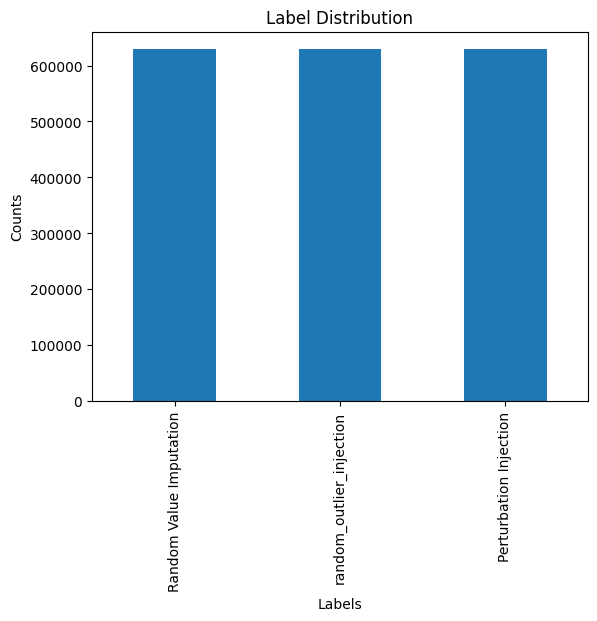

In [25]:
label_counts = data['adversarial'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Distribution')
plt.show()

In [34]:
data.tail()

Timestamp   Source Port   Min Packet Length  \
2515494  11520.970124  49767.995737          320.915807   
2515495  24243.972529  55084.980713          383.064134   
2515496  25697.916724  59547.951250          322.084679   
2515497  19613.036493  41954.999532          330.041340   
2515498  11762.916243  35247.066455          383.037348   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
2515494              321.019754  144552.054831           344.229508   
2515495              383.043543  174890.940215           382.900217   
2515496              321.937662  222772.958124           339.434274   
2515497              329.955484  104088.099193           345.527371   
2515498              382.916842   73618.061739           383.006451   

          Fwd Packet Length Max   Average Packet Size   ACK Flag Count  \
2515494              392.957526            401.586421        -0.087913   
2515495              383.052979            574.530929        -0.059685   
2515496              373.983678            395.913302        -0.026132   
2515497              369.074131            432.098263         0.018243   
2515498              383.070377            574.496971         0.021319   

          Avg Fwd Segment Size  ...   Max Packet Length   Protocol  \
2515494             347.990869  ...          392.935703  17.061320   
2515495             383.034281  ...          382.980114  16.958033   
2515496             342.264585  ...          373.908581  16.943215   
2515497             349.467187  ...          368.985673  17.092937   
2515498             382.961375  ...          383.017882  17.022375   

         Fwd Packets/s   Flow Packets/s  Total Length of Fwd Packets  \
2515494   2.816970e+01     2.818773e+01                  2088.071400   
2515495   9.999999e+05     1.000000e+06                   766.042031   
2515496   2.537743e+01     2.548356e+01                  2053.963037   
2515497   3.658693e+01     3.671978e+01                  1398.051730   
2515498   2.000000e+06     2.000000e+06                   766.036908   

          Subflow Fwd Bytes   Destination Port   act_data_pkt_fwd     Label  \
2515494         2088.017220       28889.999192           4.993592  6.997256   
2515495          765.927218        4260.080988           1.089313  6.948477   
2515496         2053.971178       32513.923246           4.955838  7.034663   
2515497         1398.018960       50493.061974           2.903662  7.038629   
2515498          765.964959        8389.920455           1.026976  7.014164   

                    adversarial  
2515494  Perturbation Injection  
2515495  Perturbation Injection  
2515496  Perturbation Injection  
2515497  Perturbation Injection  
2515498  Perturbation Injection  

[5 rows x 22 columns]

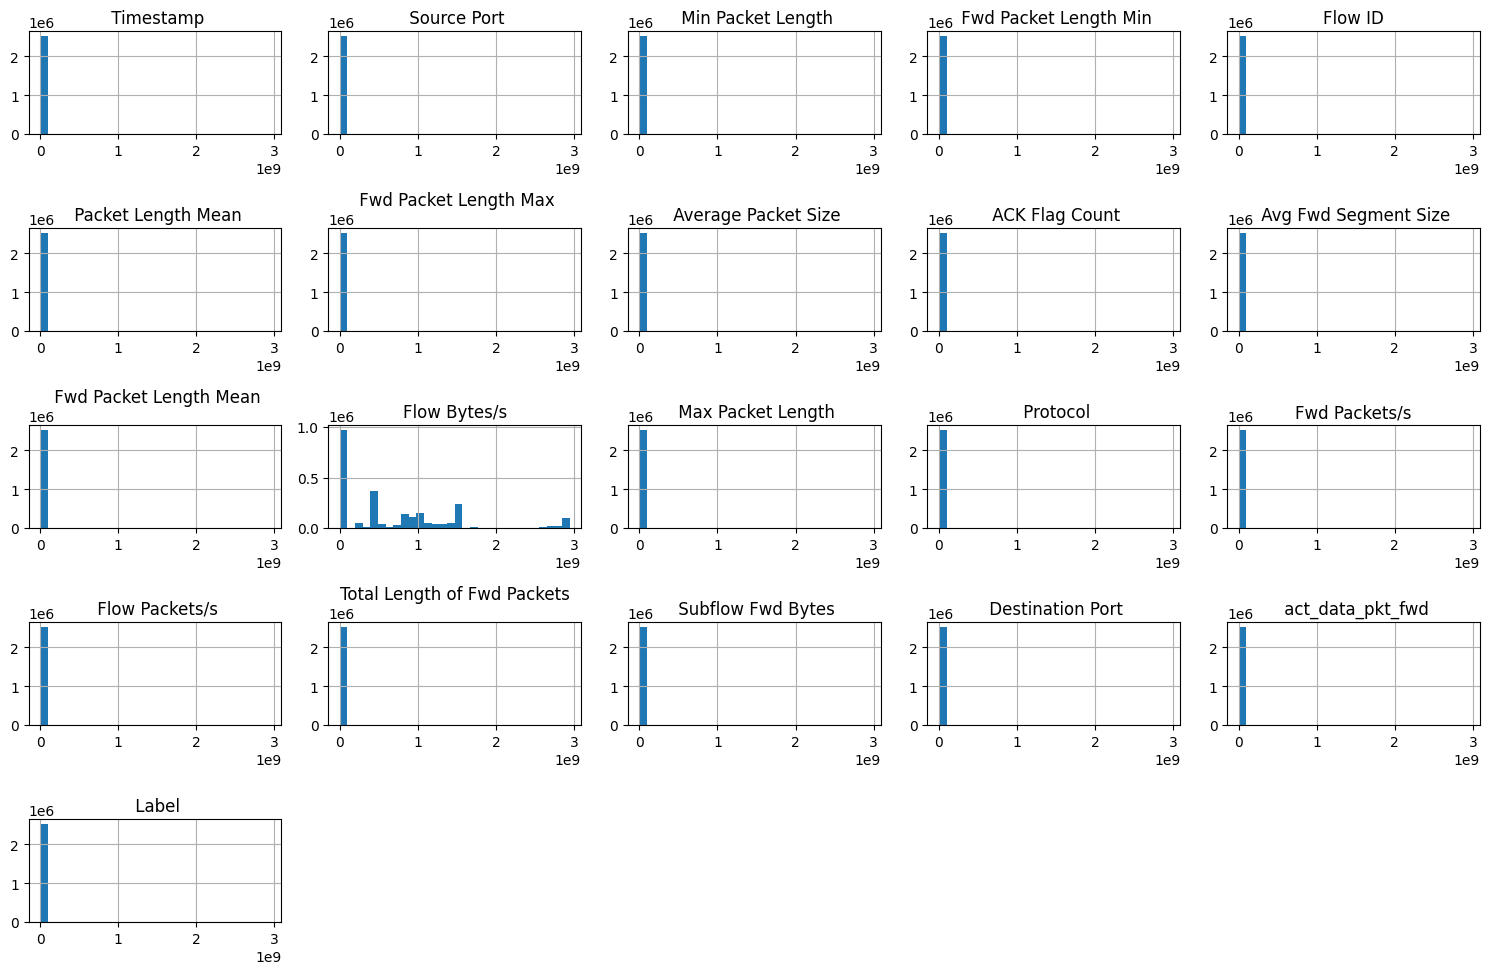

In [26]:
df_merged.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

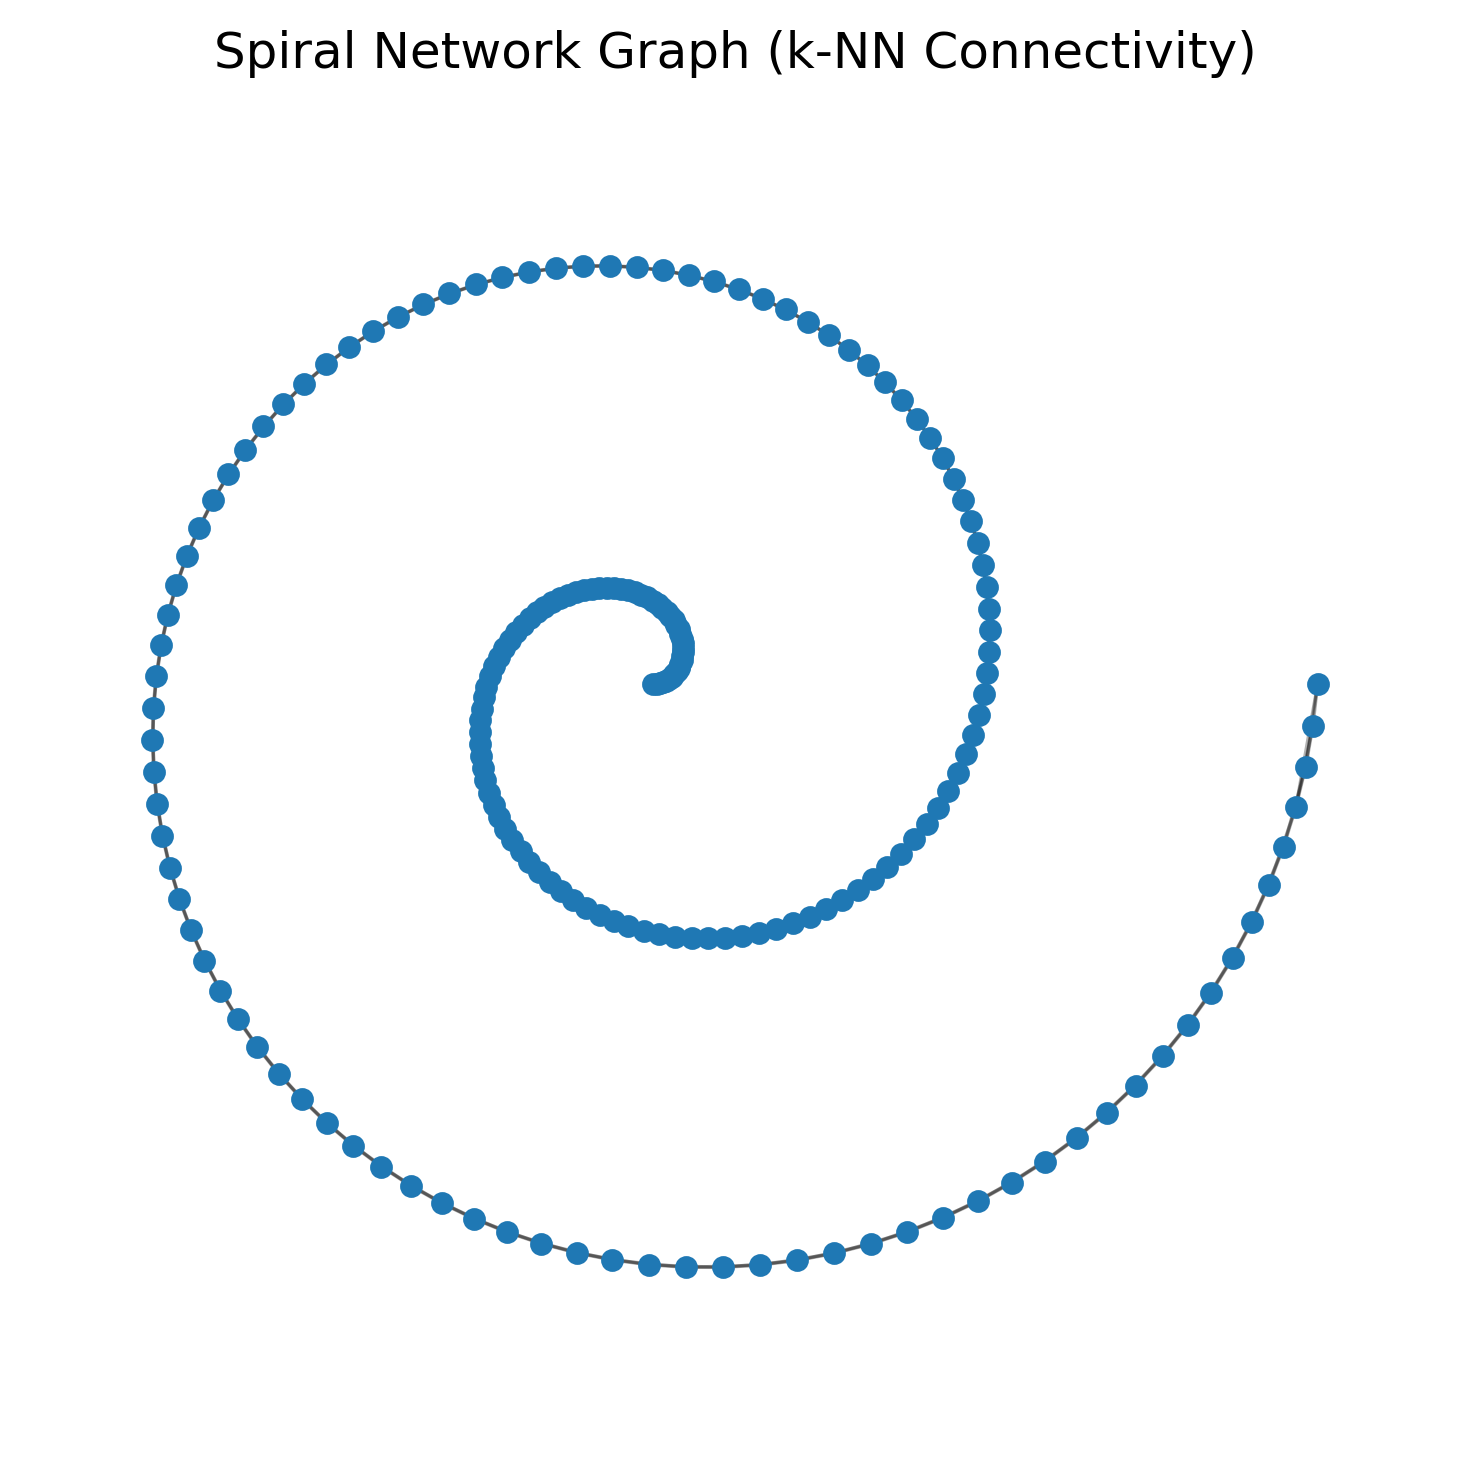

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.neighbors import NearestNeighbors

# -----------------------------
# SPIRAL DATA
# -----------------------------
n_points = 200
theta = np.linspace(0, 4 * np.pi, n_points)
r = 0.15 * theta

x = r * np.cos(theta)
y = r * np.sin(theta)
X = np.column_stack((x, y))

# -----------------------------
# KNN GRAPH (LOCAL CONNECTIVITY)
# -----------------------------
k = 3  # number of neighbors
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
_, indices = nbrs.kneighbors(X)

G = nx.Graph()

# Add nodes
for i in range(n_points):
    G.add_node(i, pos=(x[i], y[i]))

# Add edges
for i in range(n_points):
    for j in indices[i][1:]:
        G.add_edge(i, j)

# -----------------------------
# VISUALIZATION
# -----------------------------
pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(5, 5), dpi=300)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.8)
nx.draw_networkx_nodes(G, pos, node_size=20)

plt.title("Spiral Network Graph (k-NN Connectivity)")
plt.axis("equal")
plt.axis("off")
plt.tight_layout()
plt.show()


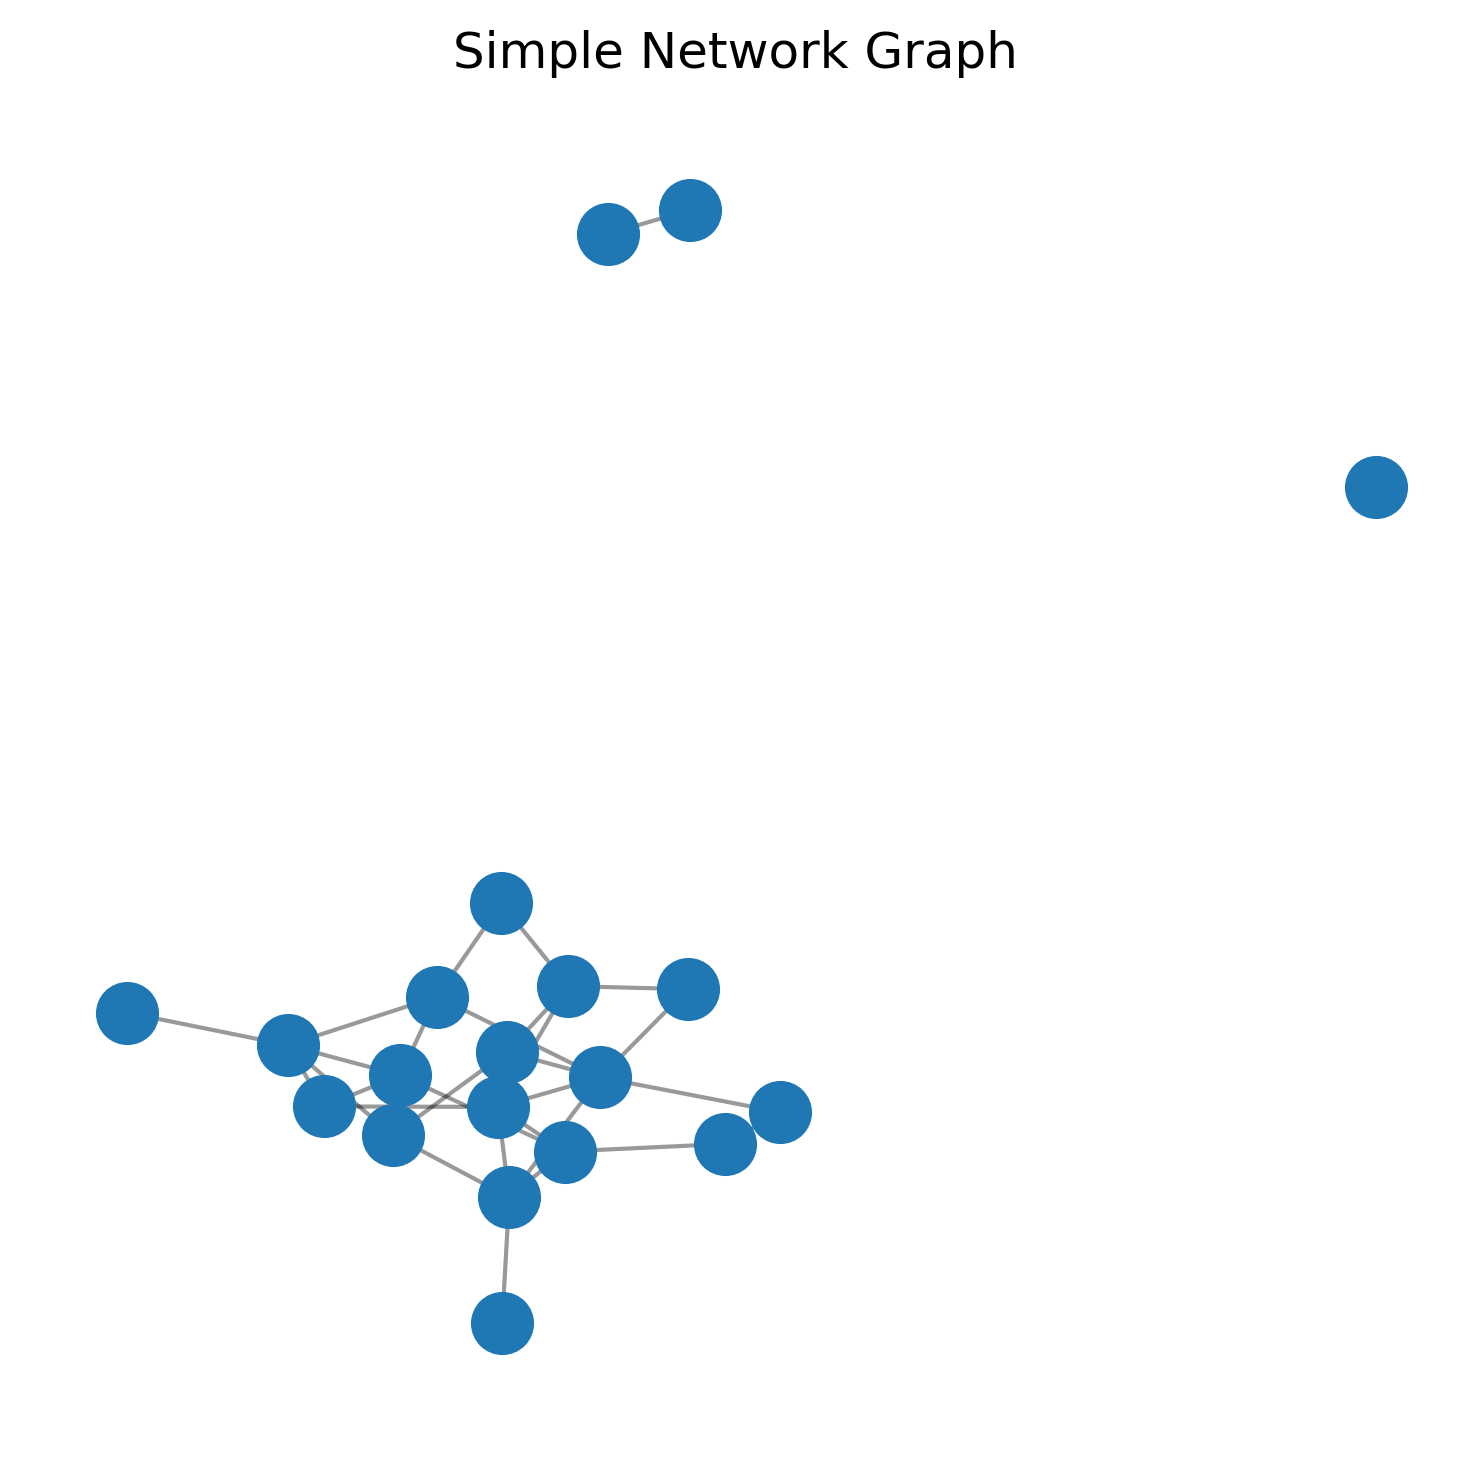

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# -----------------------------
# CREATE GRAPH
# -----------------------------
num_nodes = 20
prob_edge = 0.15

G = nx.erdos_renyi_graph(num_nodes, prob_edge, seed=42)

# -----------------------------
# LAYOUT (FOR VISUALIZATION)
# -----------------------------
pos = nx.spring_layout(G, seed=42)

# -----------------------------
# DRAW GRAPH
# -----------------------------
plt.figure(figsize=(5, 5), dpi=300)

nx.draw_networkx_edges(
    G, pos,
    alpha=0.4,
    width=1
)

nx.draw_networkx_nodes(
    G, pos,
    node_size=200
)

plt.title("Simple Network Graph")
plt.axis("off")
plt.tight_layout()
plt.show()


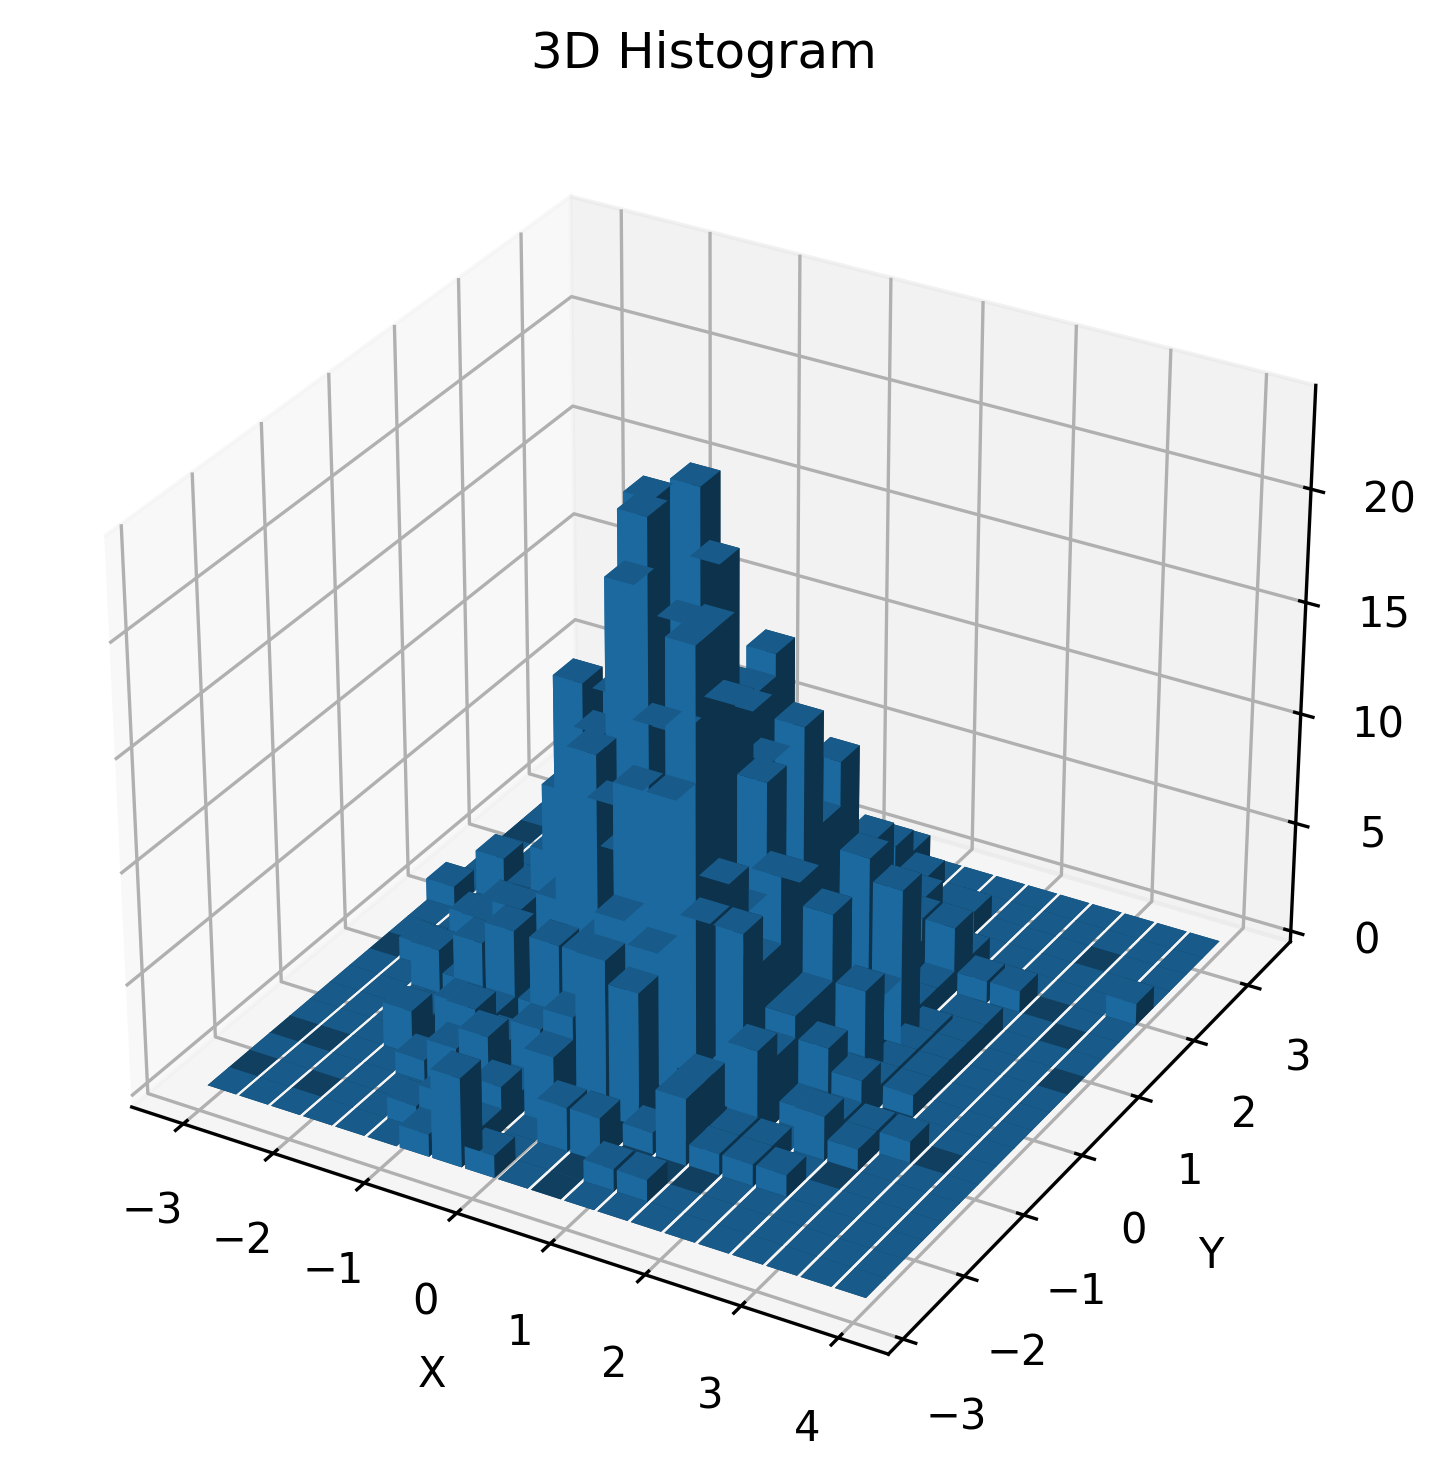

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------
# SAMPLE DATA
# -----------------------------
np.random.seed(42)
x = np.random.randn(1000)
y = np.random.randn(1000)

# -----------------------------
# COMPUTE 2D HISTOGRAM
# -----------------------------
bins = 20
hist, xedges, yedges = np.histogram2d(x, y, bins=bins)

# Bar positions
xpos, ypos = np.meshgrid(
    xedges[:-1] + 0.5 * (xedges[1] - xedges[0]),
    yedges[:-1] + 0.5 * (yedges[1] - yedges[0]),
    indexing="ij"
)

xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

dx = dy = (xedges[1] - xedges[0]) * 0.9
dz = hist.ravel()

# -----------------------------
# 3D HISTOGRAM PLOT
# -----------------------------
fig = plt.figure(figsize=(6, 5), dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(
    xpos, ypos, zpos,
    dx, dy, dz,
    shade=True
)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Frequency")
ax.set_title("3D Histogram")

plt.tight_layout()
plt.show()


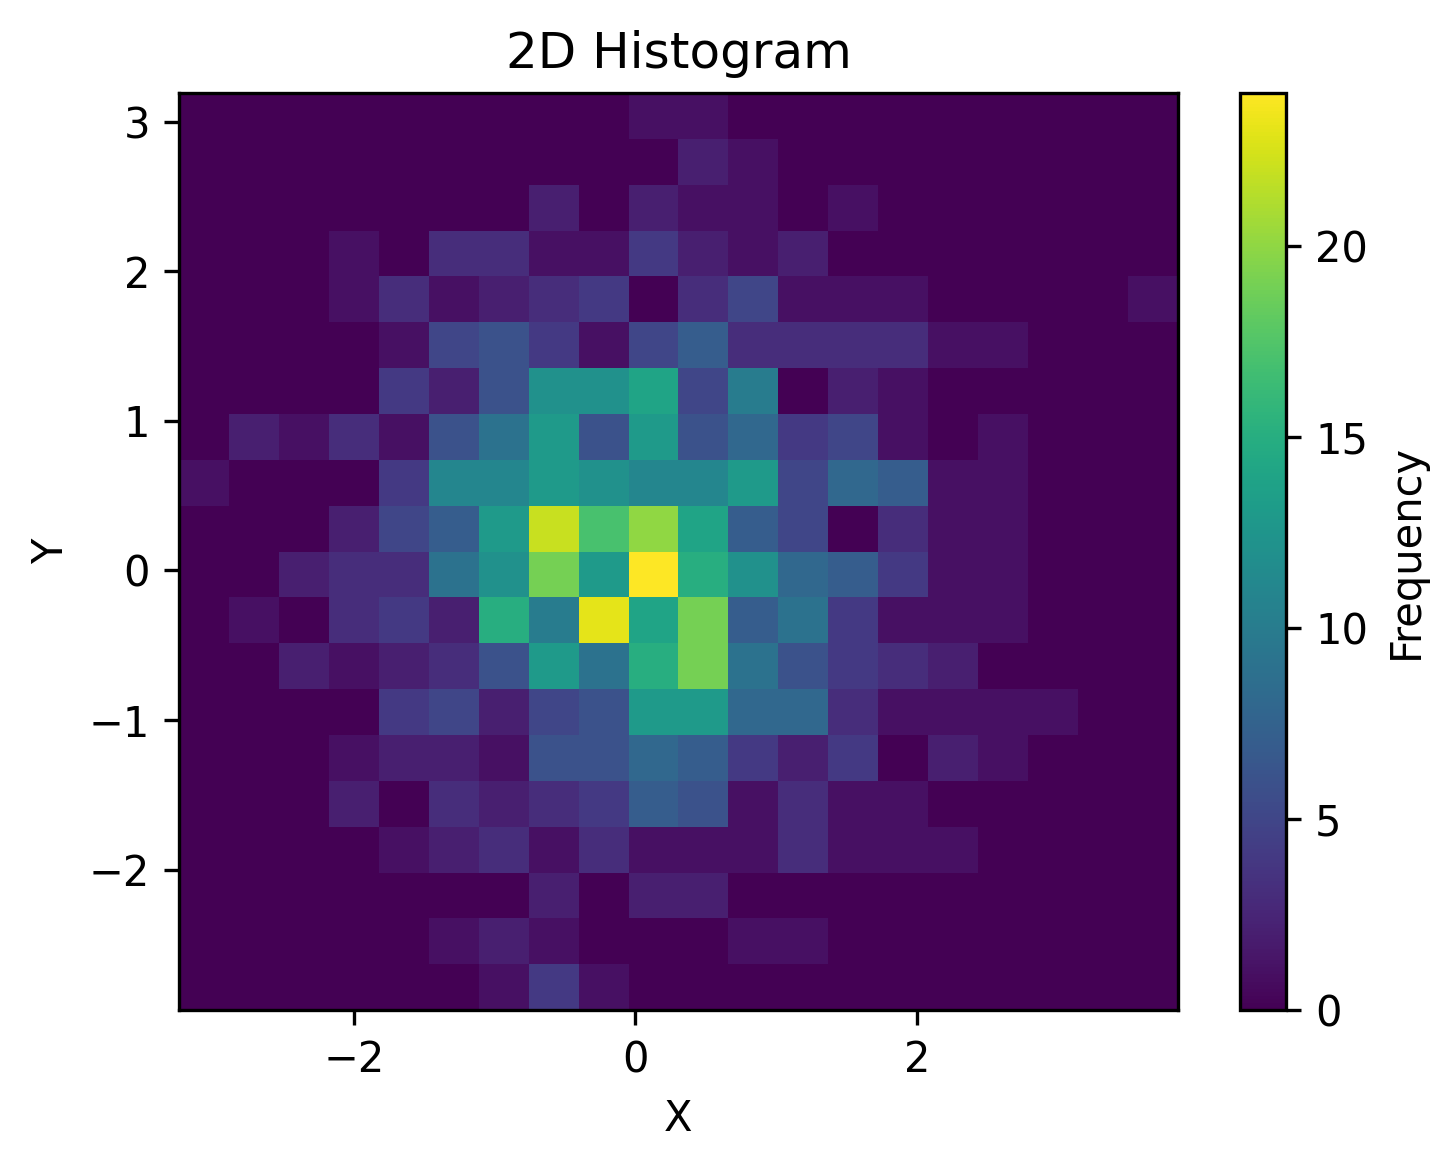

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# SAMPLE DATA
# -----------------------------
np.random.seed(42)
x = np.random.randn(1000)
y = np.random.randn(1000)

# -----------------------------
# 2D HISTOGRAM
# -----------------------------
plt.figure(figsize=(5, 4), dpi=300)

plt.hist2d(
    x, y,
    bins=20
)

plt.colorbar(label="Frequency")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Histogram")

plt.tight_layout()
plt.show()


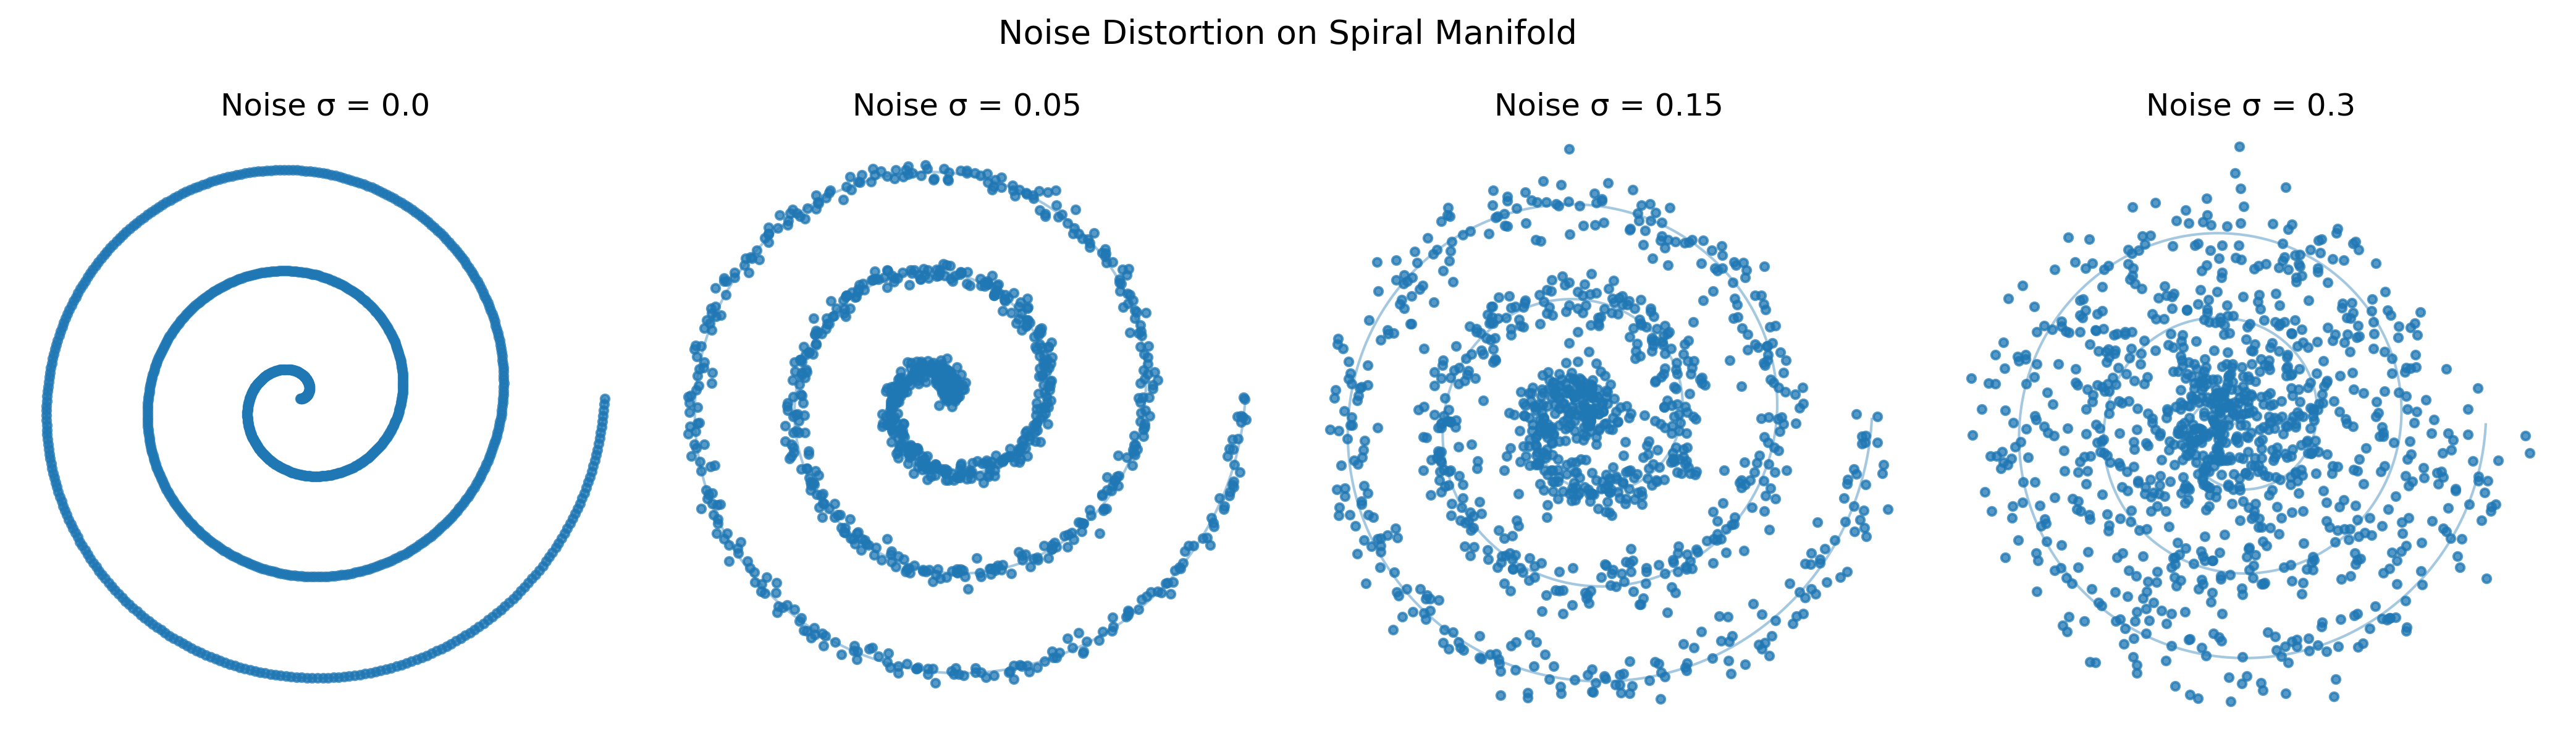

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# BASE SPIRAL MODEL
# -----------------------------
n_points = 1000
theta = np.linspace(0, 6 * np.pi, n_points)
r = 0.15 * theta

x_clean = r * np.cos(theta)
y_clean = r * np.sin(theta)

# Noise levels
noise_levels = [0.0, 0.05, 0.15, 0.30]

# -----------------------------
# VISUALIZATION
# -----------------------------
fig, axes = plt.subplots(1, 4, figsize=(14, 4), dpi=300)

for ax, noise in zip(axes, noise_levels):
    x_noisy = x_clean + noise * np.random.randn(n_points)
    y_noisy = y_clean + noise * np.random.randn(n_points)

    ax.scatter(
        x_noisy, y_noisy,
        s=10,
        alpha=0.75
    )

    # Underlying clean spiral (reference)
    ax.plot(
        x_clean, y_clean,
        linewidth=1,
        alpha=0.4
    )

    ax.set_title(f"Noise σ = {noise}")
    ax.axis("equal")
    ax.axis("off")

fig.suptitle("Noise Distortion on Spiral Manifold", fontsize=13)
plt.tight_layout()
plt.show()


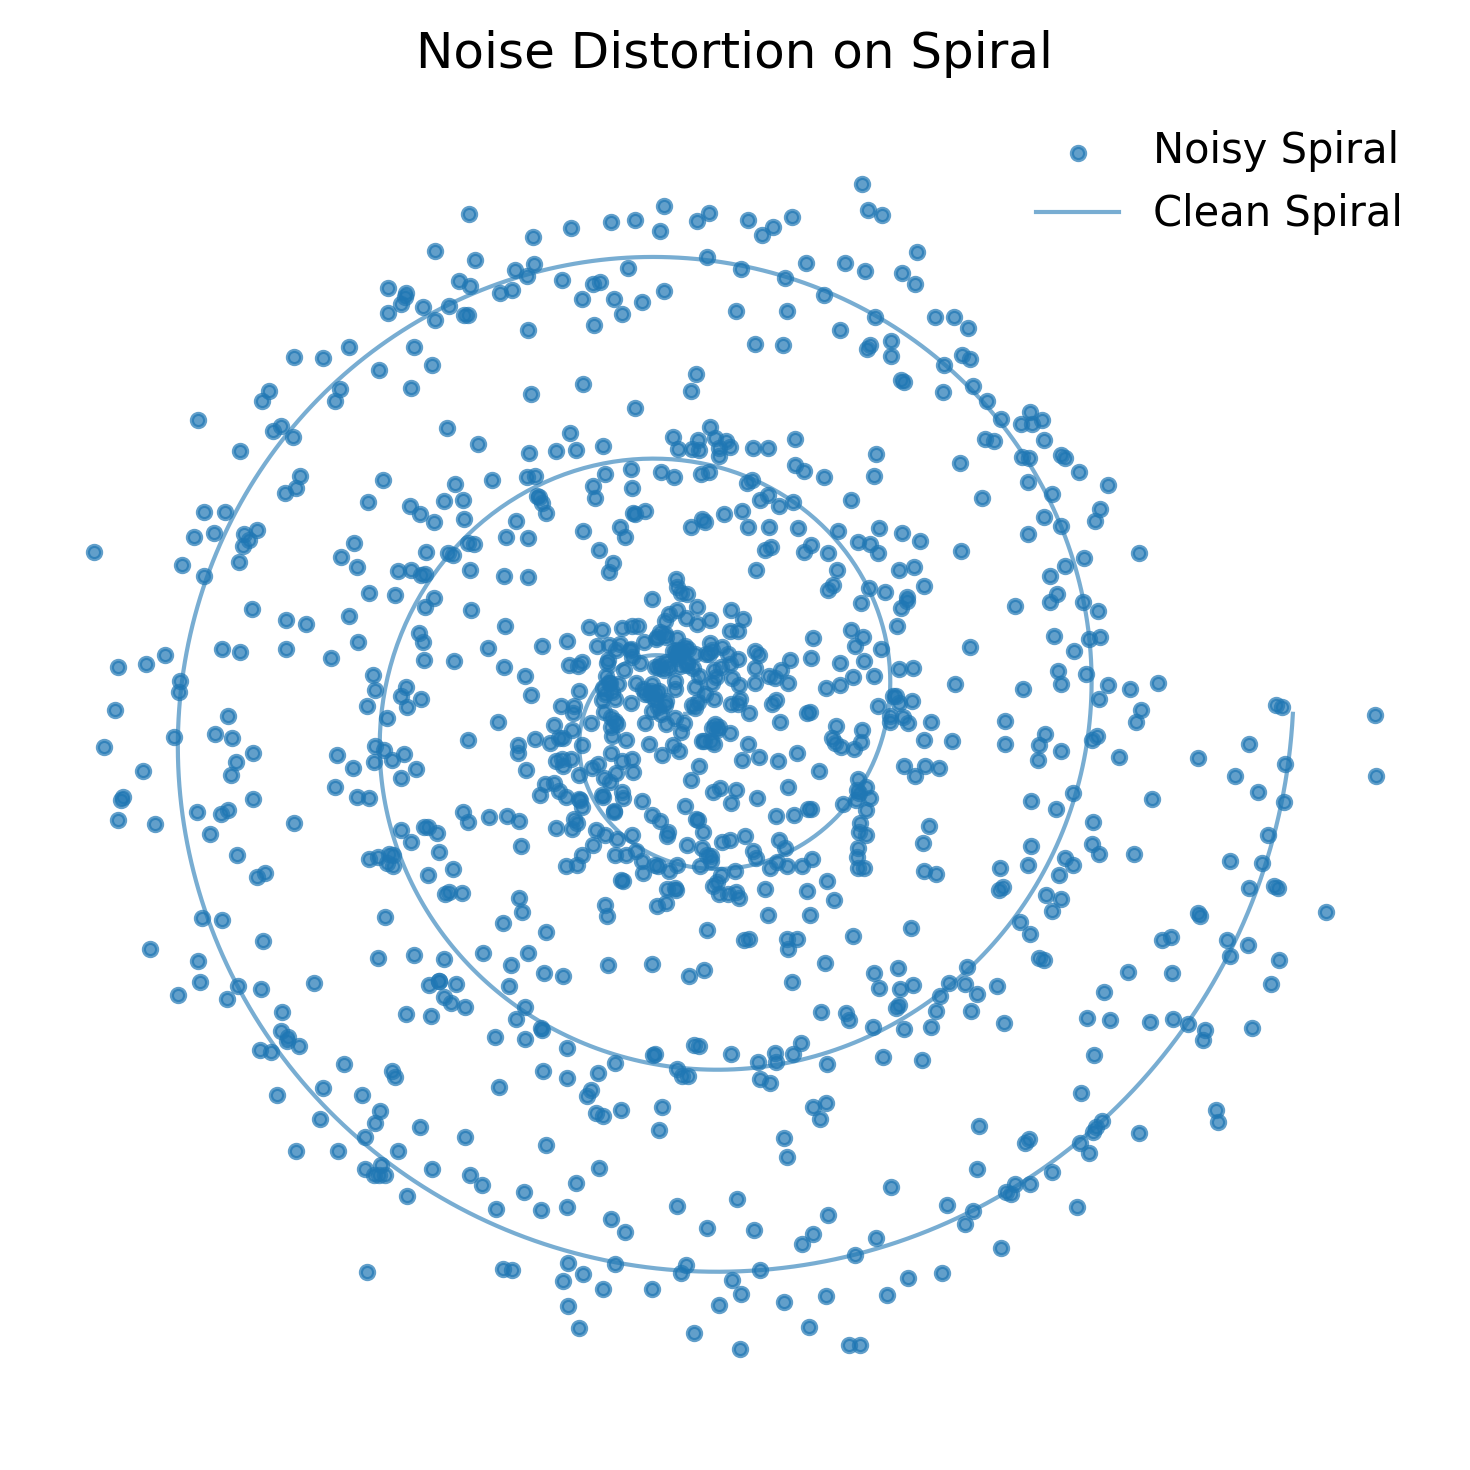

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# BASE SPIRAL
# -----------------------------
n_points = 1000
theta = np.linspace(0, 6 * np.pi, n_points)
r = 0.15 * theta

x_clean = r * np.cos(theta)
y_clean = r * np.sin(theta)

# -----------------------------
# ADD NOISE
# -----------------------------
noise = 0.2   # change this value to see distortion
x_noisy = x_clean + noise * np.random.randn(n_points)
y_noisy = y_clean + noise * np.random.randn(n_points)

# -----------------------------
# VISUALIZATION
# -----------------------------
plt.figure(figsize=(5, 5), dpi=300)

# Noisy spiral
plt.scatter(
    x_noisy, y_noisy,
    s=10,
    alpha=0.7,
    label="Noisy Spiral"
)

# Clean reference
plt.plot(
    x_clean, y_clean,
    linewidth=1,
    alpha=0.6,
    label="Clean Spiral"
)

plt.title("Noise Distortion on Spiral")
plt.axis("equal")
plt.axis("off")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


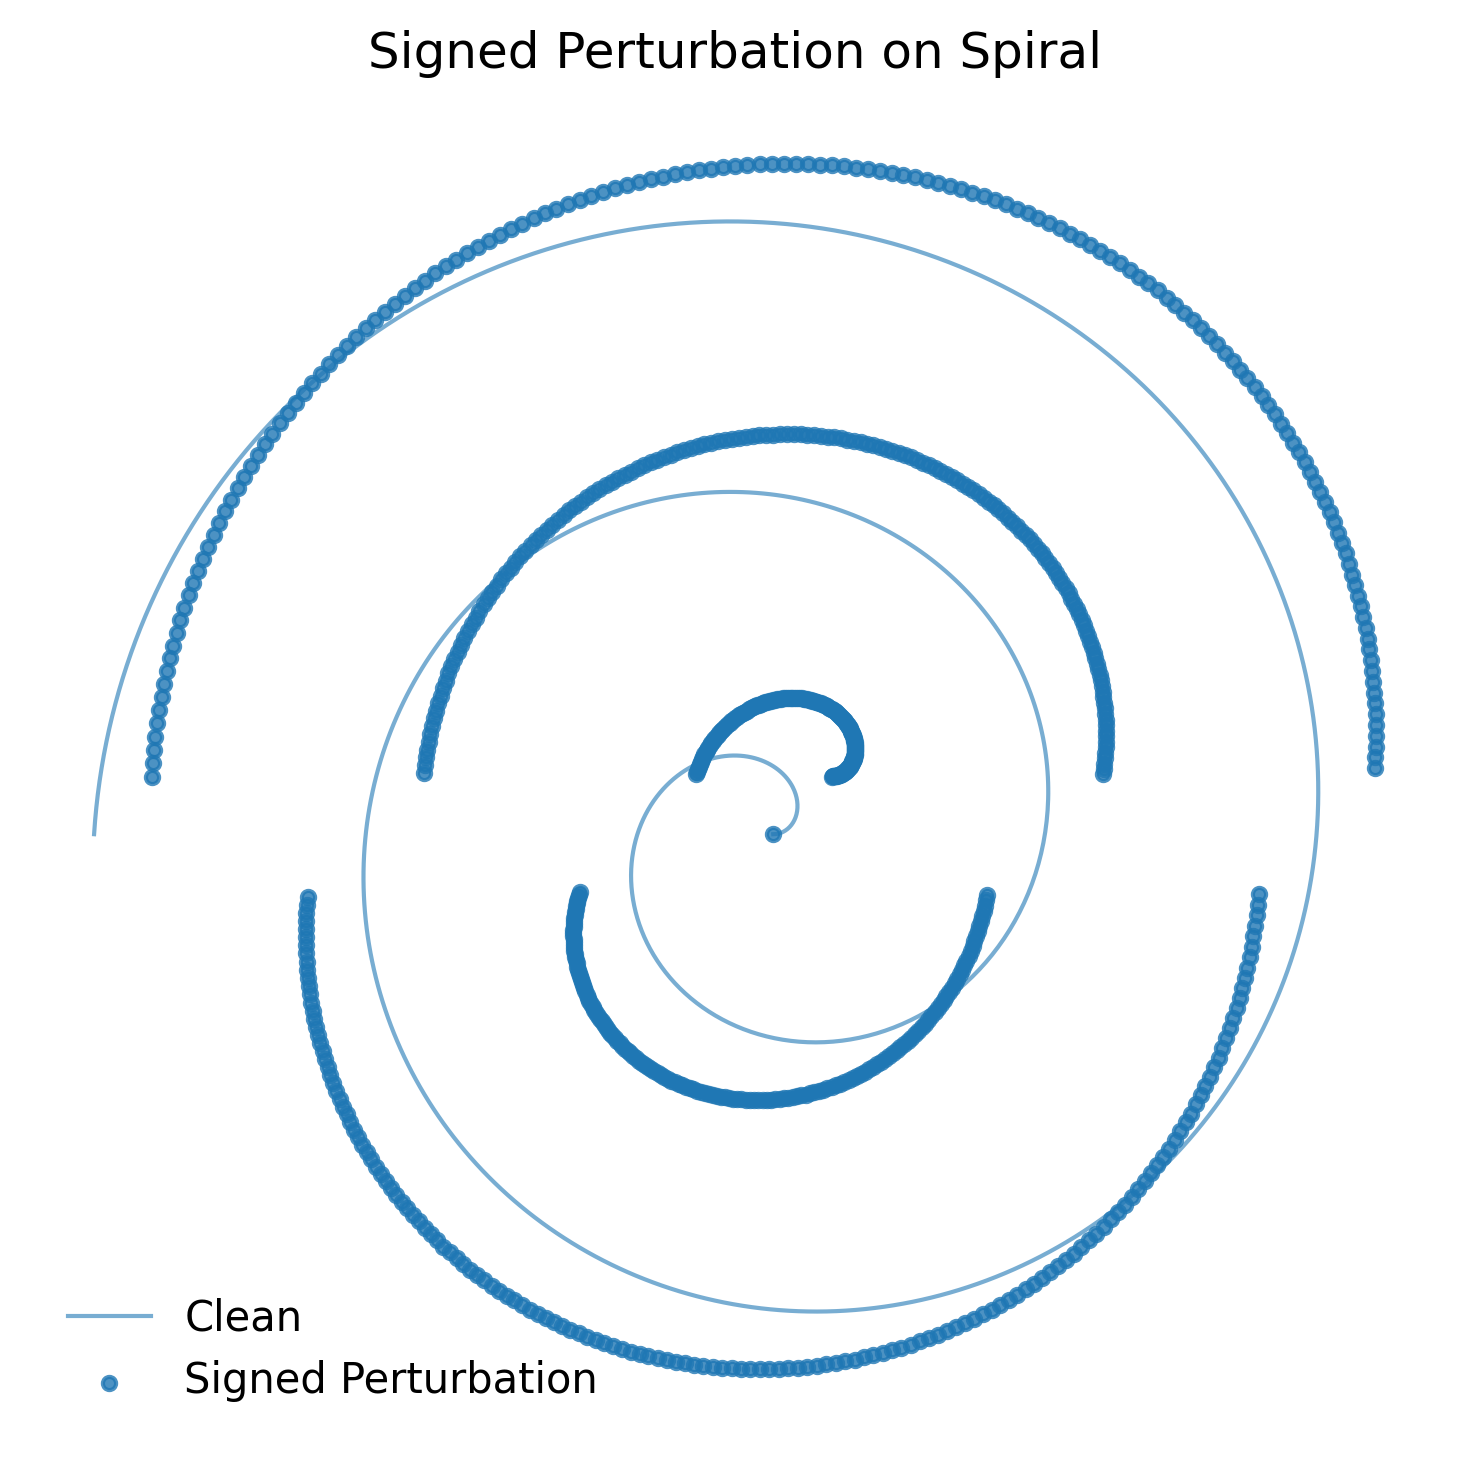

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Base spiral
n = 800
theta = np.linspace(0, 5*np.pi, n)
r = 0.15 * theta
x = r * np.cos(theta)
y = r * np.sin(theta)

# Signed perturbation
eps = 0.2
sign = np.sign(np.sin(theta))   # deterministic sign pattern

x_signed = x + eps * sign
y_signed = y + eps * sign

plt.figure(figsize=(5,5), dpi=300)
plt.plot(x, y, linewidth=1, alpha=0.6, label="Clean")
plt.scatter(x_signed, y_signed, s=10, alpha=0.8, label="Signed Perturbation")
plt.axis("equal")
plt.axis("off")
plt.legend(frameon=False)
plt.title("Signed Perturbation on Spiral")
plt.tight_layout()
plt.show()


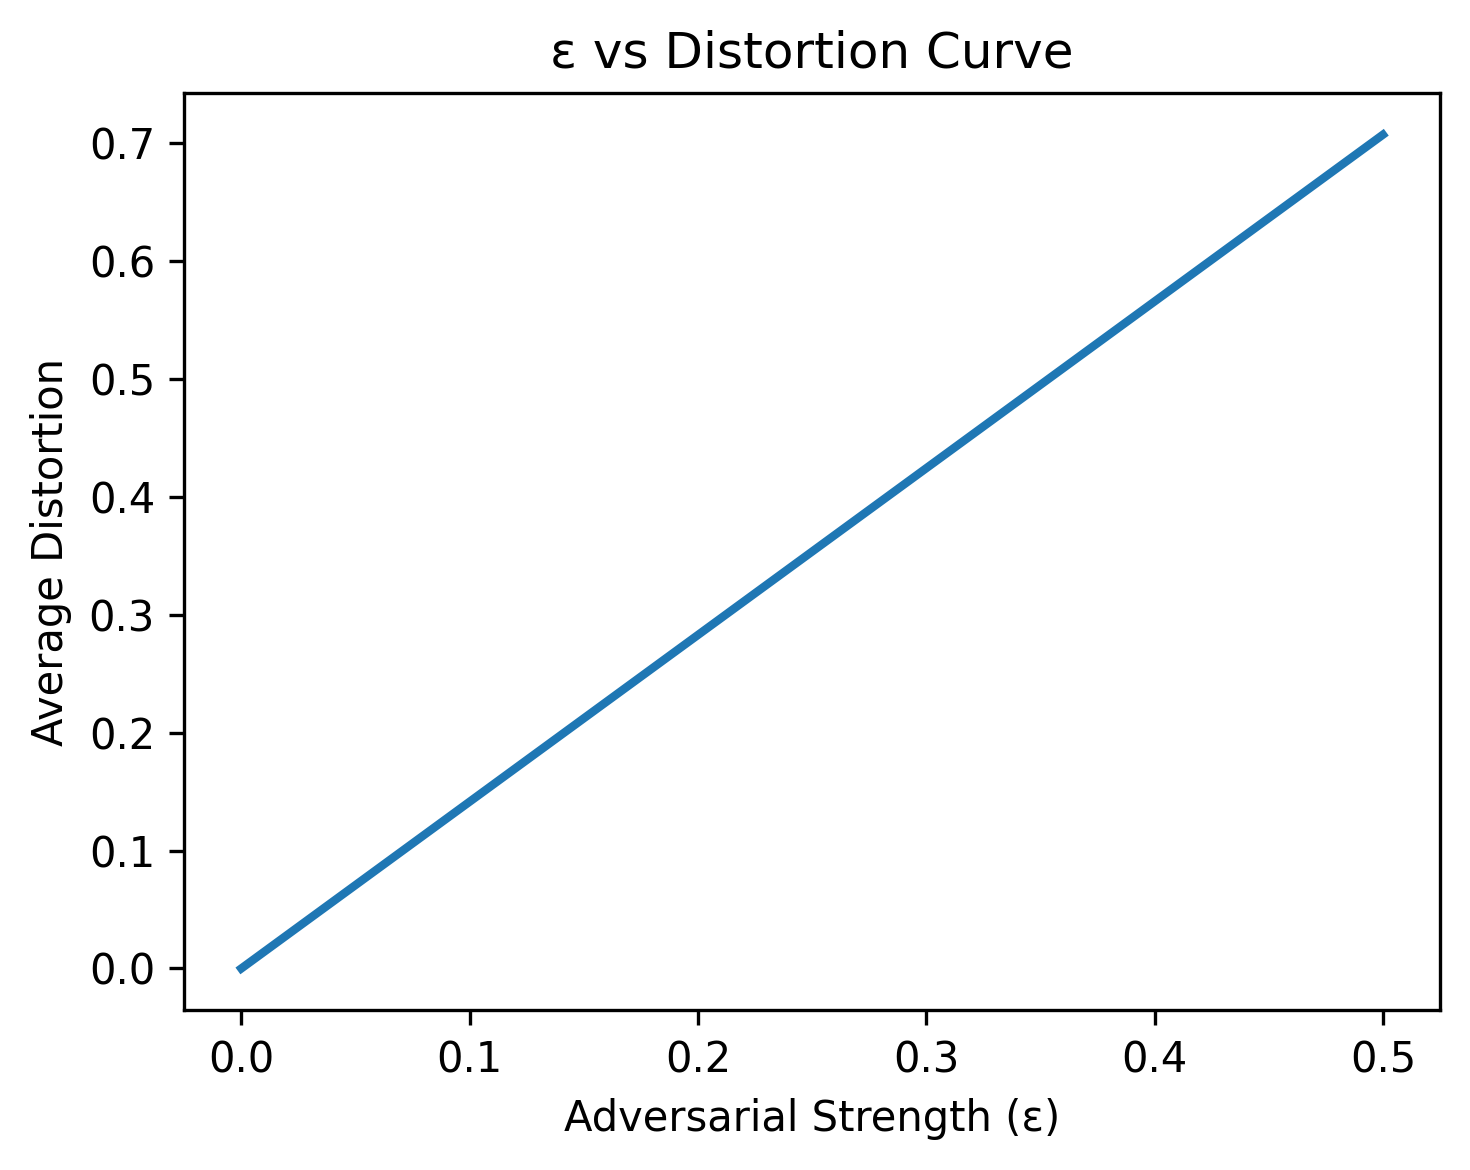

In [33]:
epsilons = np.linspace(0, 0.5, 25)
avg_dist = []

for eps in epsilons:
    x_adv = x + eps * np.sign(np.random.randn(n))
    y_adv = y + eps * np.sign(np.random.randn(n))

    d = np.mean(np.sqrt((x_adv - x)**2 + (y_adv - y)**2))
    avg_dist.append(d)

plt.figure(figsize=(5,4), dpi=300)
plt.plot(epsilons, avg_dist, linewidth=2)
plt.xlabel("Adversarial Strength (ε)")
plt.ylabel("Average Distortion")
plt.title("ε vs Distortion Curve")
plt.grid(False)
plt.tight_layout()
plt.show()


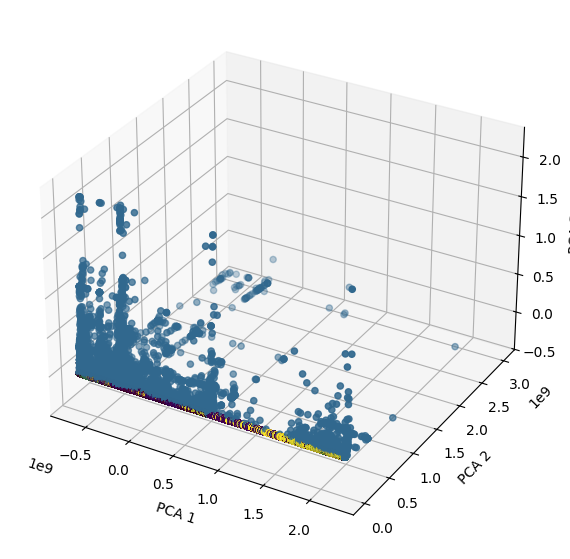

In [36]:
from sklearn.decomposition import PCA

features = df_merged.drop(columns=['adversarial'])
pca = PCA(n_components=3)
pca_values = pca.fit_transform(features)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    pca_values[:, 0],
    pca_values[:, 1],
    pca_values[:, 2],
    c=df_merged['adversarial'].astype('category').cat.codes
)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()


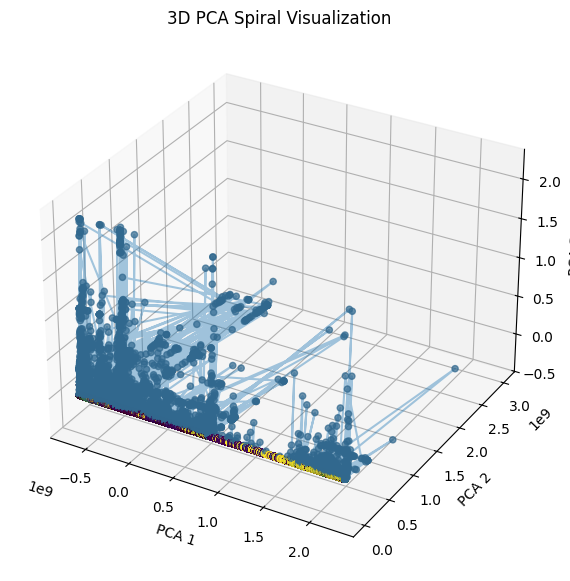

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -----------------------------
# PCA TRANSFORMATION
# -----------------------------
features = df_merged.drop(columns=['adversarial'])
pca = PCA(n_components=3)
pca_values = pca.fit_transform(features)

# Sort points along first principal component
order = np.argsort(pca_values[:, 0])
pca_sorted = pca_values[order]
labels_sorted = df_merged['adversarial'].iloc[order]

# -----------------------------
# 3D SPIRAL VISUALIZATION
# -----------------------------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.scatter(
    pca_sorted[:, 0],
    pca_sorted[:, 1],
    pca_sorted[:, 2],
    c=labels_sorted.astype('category').cat.codes,
    alpha=0.7
)

# Connect points to form spiral trajectory
ax.plot(
    pca_sorted[:, 0],
    pca_sorted[:, 1],
    pca_sorted[:, 2],
    alpha=0.4
)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D PCA Spiral Visualization')

plt.show()


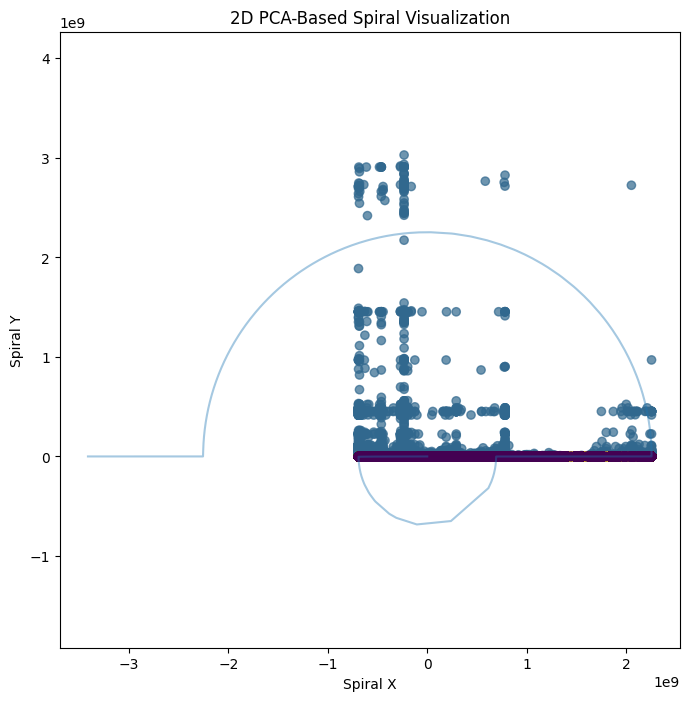

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -----------------------------
# PCA TRANSFORMATION
# -----------------------------
features = df_merged.drop(columns=['adversarial'])
pca = PCA(n_components=2)
pca_values = pca.fit_transform(features)

x = pca_values[:, 0]
y = pca_values[:, 1]

# Convert to polar coordinates
theta = np.arctan2(y, x)
r = np.sqrt(x**2 + y**2)

# -----------------------------
# SPIRAL PLOT
# -----------------------------
plt.figure(figsize=(8, 8))
plt.scatter(
    r * np.cos(theta),
    r * np.sin(theta),
    c=df_merged['adversarial'].astype('category').cat.codes,
    alpha=0.7
)

plt.plot(
    np.sort(r) * np.cos(np.sort(theta)),
    np.sort(r) * np.sin(np.sort(theta)),
    alpha=0.4
)

plt.xlabel('Spiral X')
plt.ylabel('Spiral Y')
plt.title('2D PCA-Based Spiral Visualization')
plt.axis('equal')
plt.show()


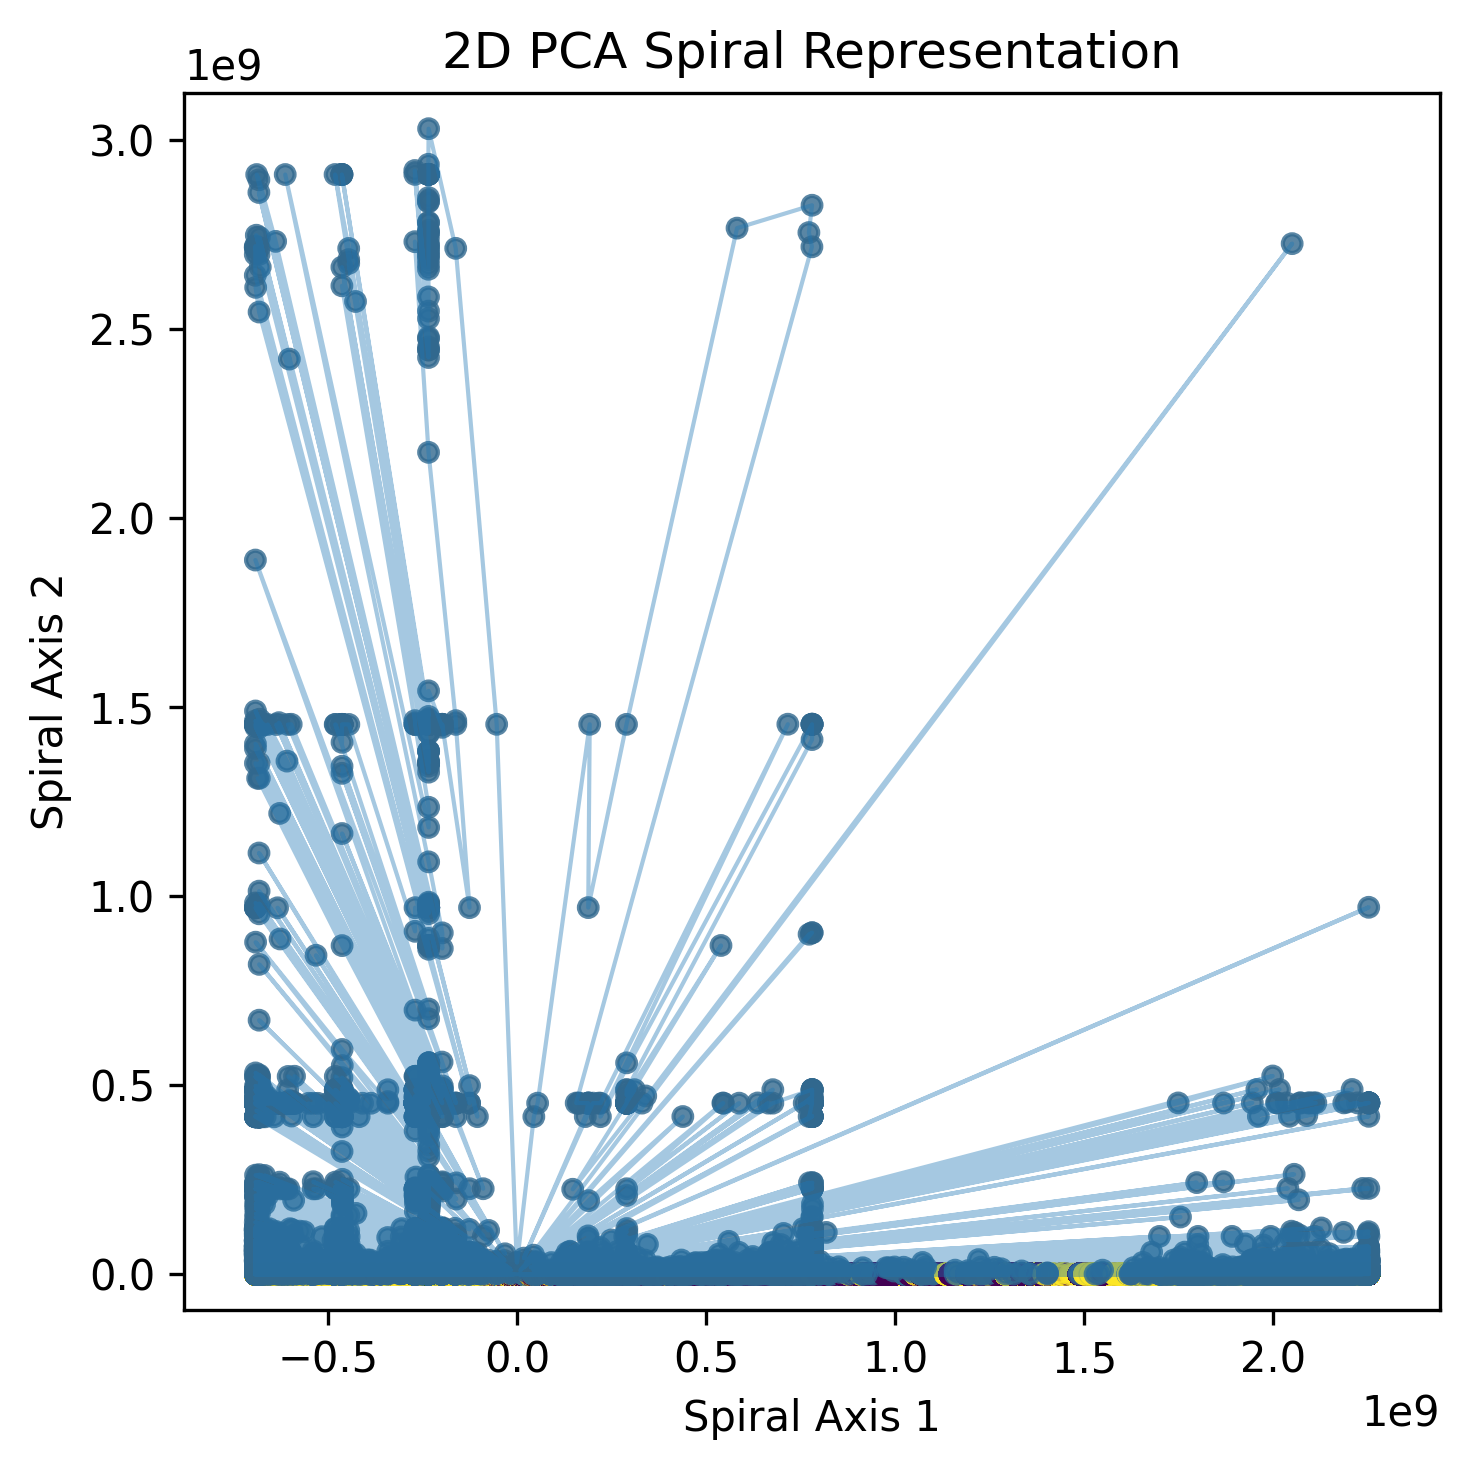

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -----------------------------
# PCA (2D)
# -----------------------------
features = df_merged.drop(columns=['adversarial'])
labels = df_merged['adversarial'].astype('category').cat.codes

pca = PCA(n_components=2, random_state=42)
pca_values = pca.fit_transform(features)

x, y = pca_values[:, 0], pca_values[:, 1]
theta = np.arctan2(y, x)
r = np.sqrt(x**2 + y**2)

# Sort for spiral continuity
order = np.argsort(theta)
x_s, y_s, r_s, l_s = x[order], y[order], r[order], labels.iloc[order]

# -----------------------------
# FIGURE SETTINGS
# -----------------------------
plt.figure(figsize=(5, 5), dpi=300)

plt.scatter(
    r_s * np.cos(theta[order]),
    r_s * np.sin(theta[order]),
    c=l_s,
    s=20,
    alpha=0.8
)

# Spiral trajectory
plt.plot(
    r_s * np.cos(theta[order]),
    r_s * np.sin(theta[order]),
    linewidth=1,
    alpha=0.4
)

plt.xlabel('Spiral Axis 1')
plt.ylabel('Spiral Axis 2')
plt.title('2D PCA Spiral Representation')
plt.axis('equal')
plt.grid(False)

plt.tight_layout()
plt.show()


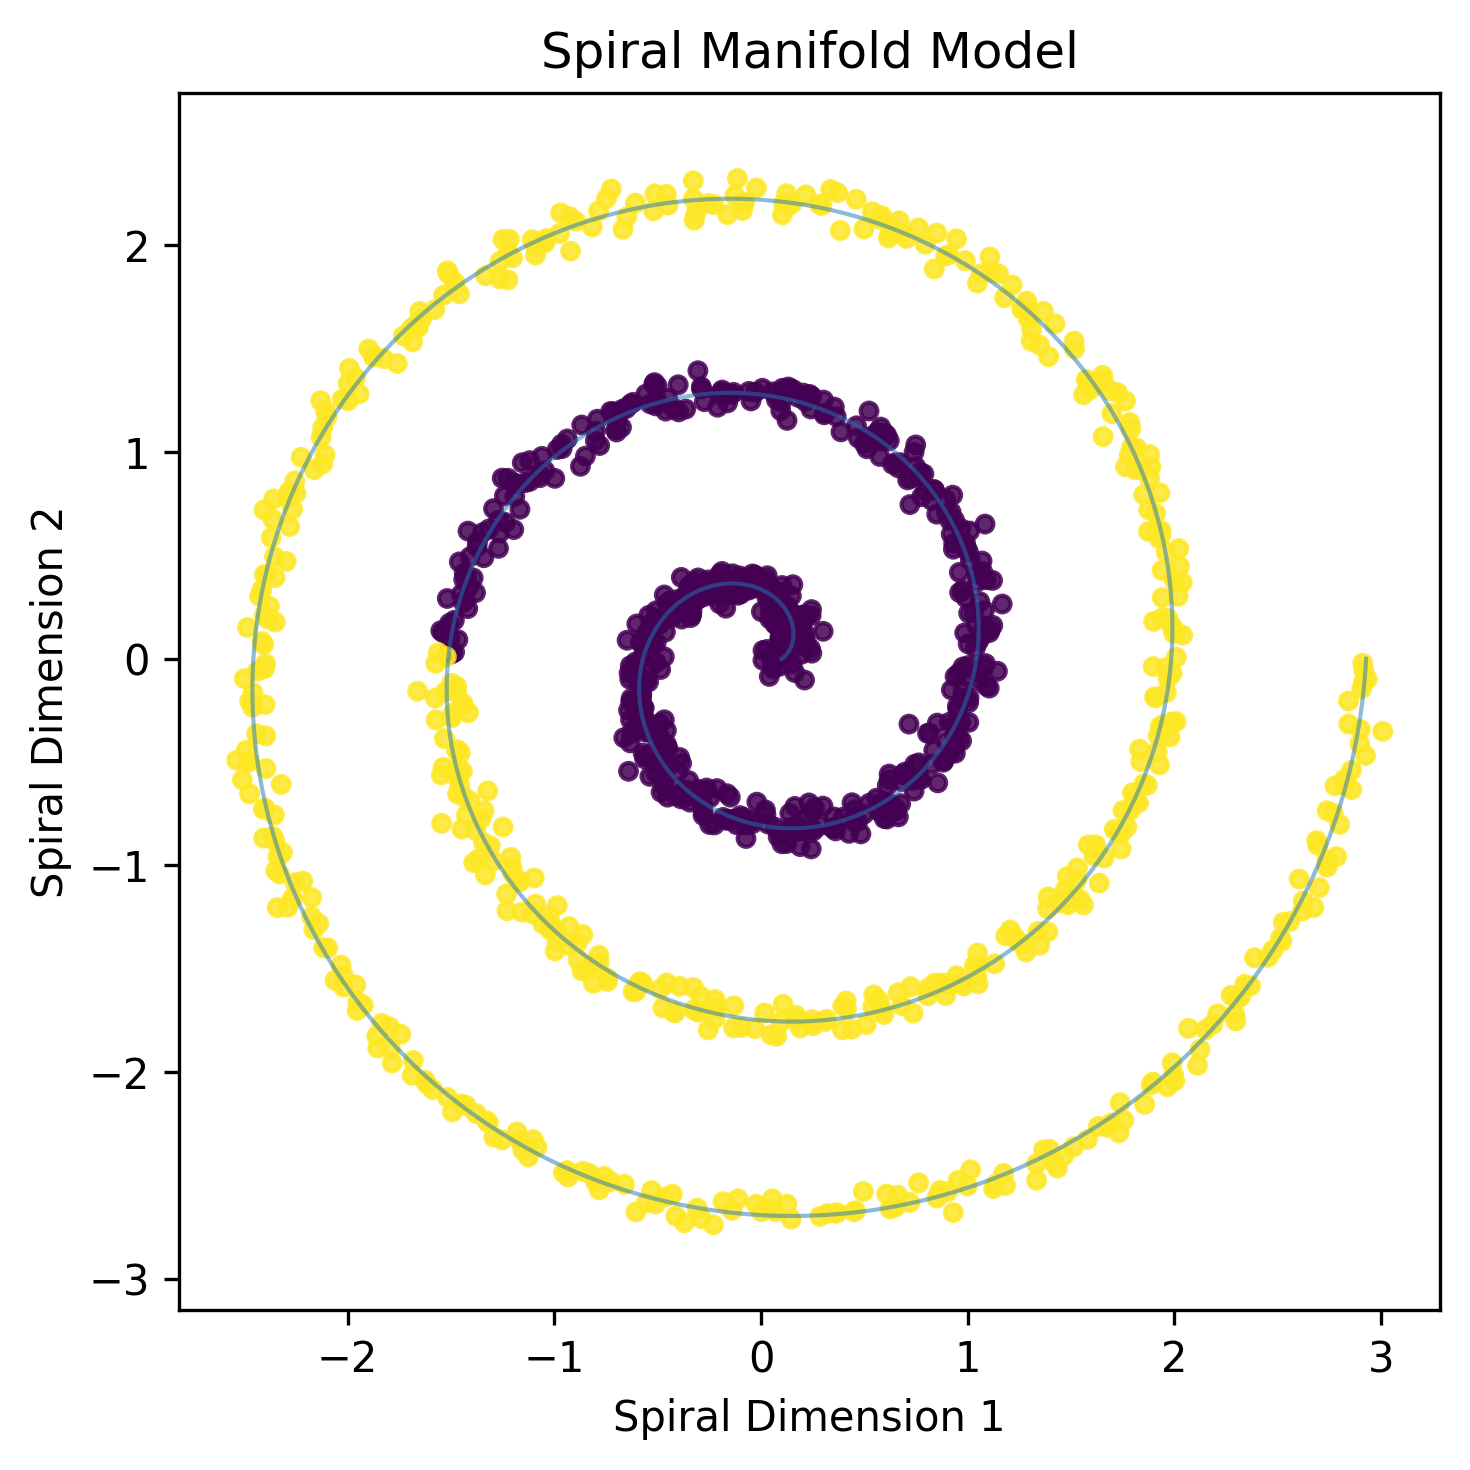

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# SPIRAL MODEL PARAMETERS
# -----------------------------
n_points = 1200
a = 0.1       # spiral offset
b = 0.15      # spiral growth rate
noise = 0.05  # noise for realism

theta = np.linspace(0, 6 * np.pi, n_points)
r = a + b * theta

# Spiral coordinates
x = r * np.cos(theta) + noise * np.random.randn(n_points)
y = r * np.sin(theta) + noise * np.random.randn(n_points)

# Binary labeling (e.g., normal vs adversarial)
labels = (theta > 3 * np.pi).astype(int)

# -----------------------------
# CONFERENCE-READY VISUAL
# -----------------------------
plt.figure(figsize=(5, 5), dpi=300)

plt.scatter(
    x, y,
    c=labels,
    s=16,
    alpha=0.85
)

plt.plot(
    r * np.cos(theta),
    r * np.sin(theta),
    linewidth=1,
    alpha=0.5
)

plt.xlabel("Spiral Dimension 1")
plt.ylabel("Spiral Dimension 2")
plt.title("Spiral Manifold Model")
plt.axis("equal")
plt.grid(False)

plt.tight_layout()
plt.show()


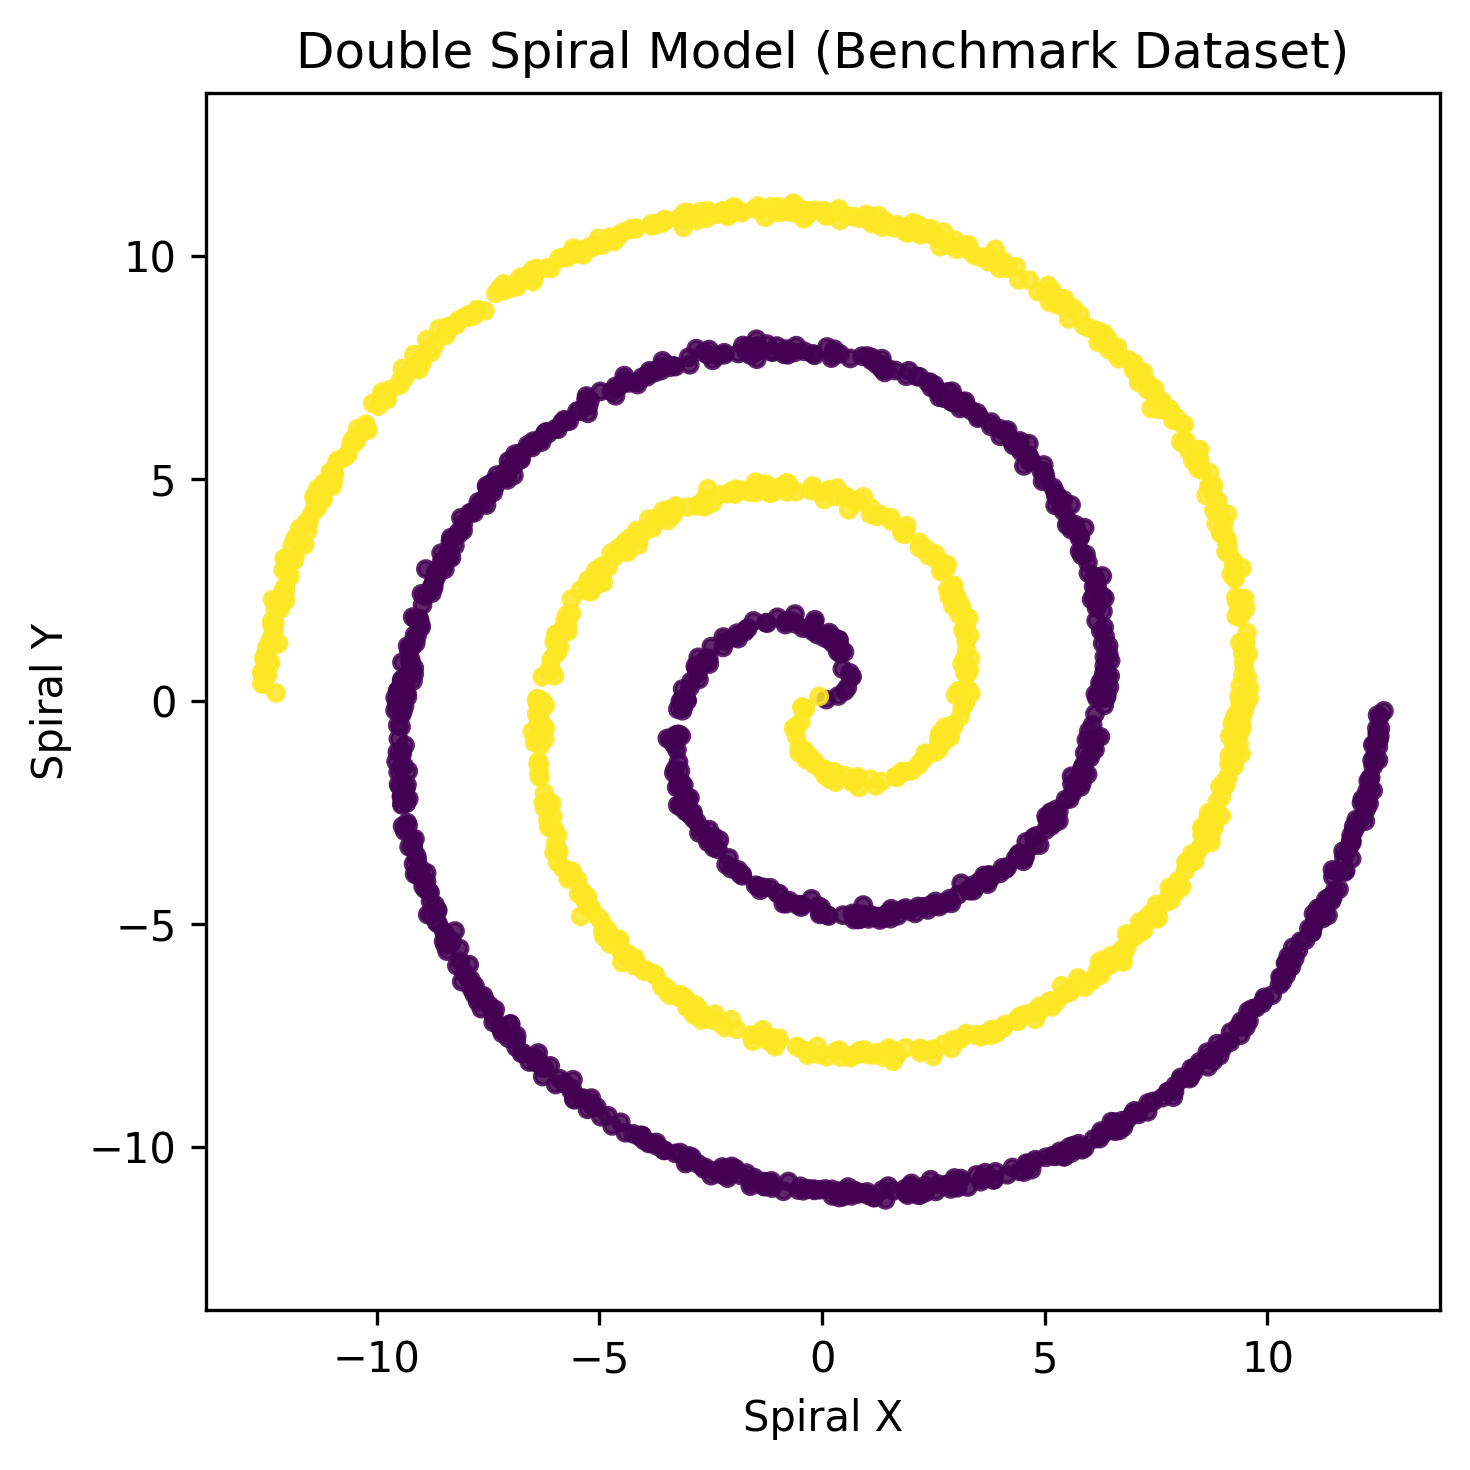

In [41]:
import numpy as np
import matplotlib.pyplot as plt

n_points = 1000
noise = 0.08

theta = np.sqrt(np.random.rand(n_points)) * 4 * np.pi

# First spiral
x1 = theta * np.cos(theta) + noise * np.random.randn(n_points)
y1 = theta * np.sin(theta) + noise * np.random.randn(n_points)

# Second spiral (mirrored)
x2 = -theta * np.cos(theta) + noise * np.random.randn(n_points)
y2 = -theta * np.sin(theta) + noise * np.random.randn(n_points)

# Stack
X = np.vstack([np.column_stack([x1, y1]),
               np.column_stack([x2, y2])])
y = np.hstack([np.zeros(n_points), np.ones(n_points)])

# -----------------------------
# VISUALIZATION
# -----------------------------
plt.figure(figsize=(5, 5), dpi=300)

plt.scatter(
    X[:, 0], X[:, 1],
    c=y,
    s=14,
    alpha=0.85
)

plt.xlabel("Spiral X")
plt.ylabel("Spiral Y")
plt.title("Double Spiral Model (Benchmark Dataset)")
plt.axis("equal")
plt.grid(False)

plt.tight_layout()
plt.show()


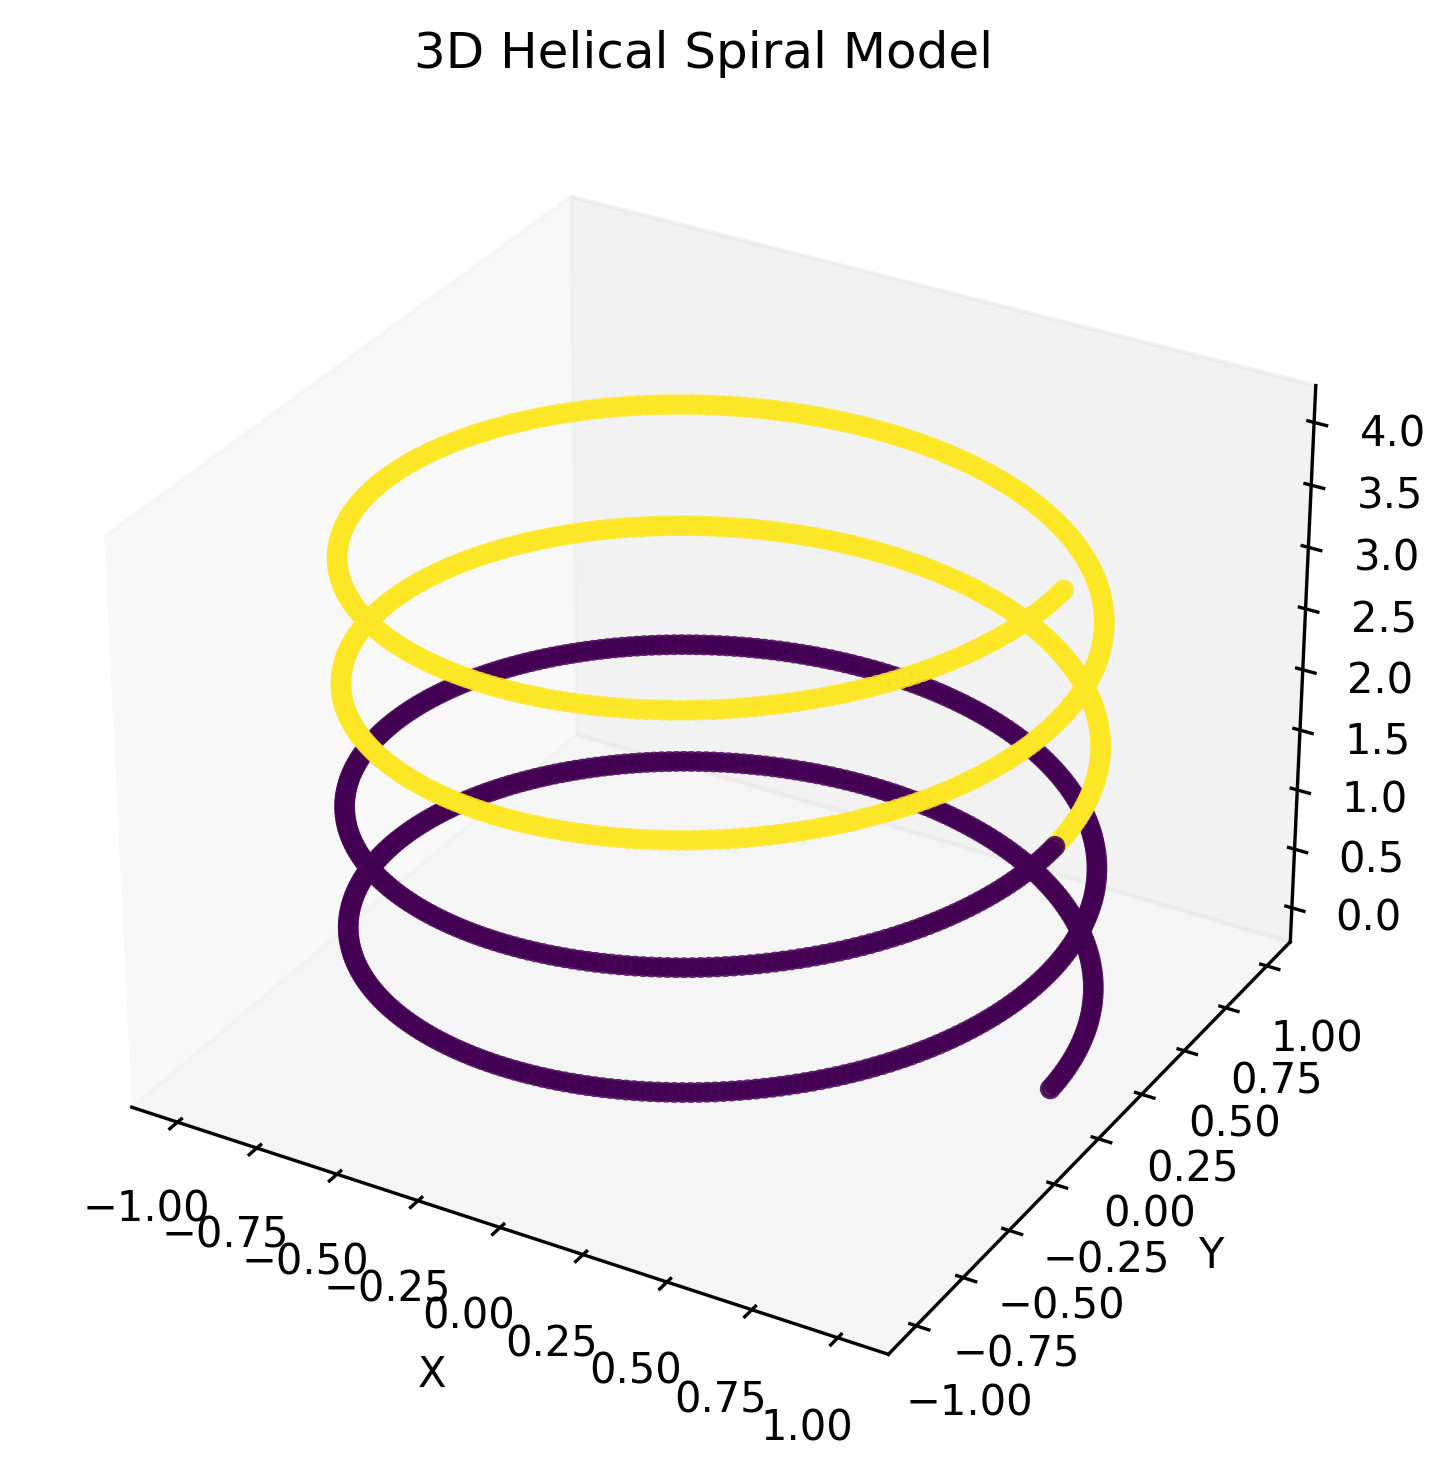

In [42]:
import numpy as np
import matplotlib.pyplot as plt

n_points = 1200
theta = np.linspace(0, 8 * np.pi, n_points)

x = np.cos(theta)
y = np.sin(theta)
z = theta / (2 * np.pi)

labels = (theta > 4 * np.pi).astype(int)

fig = plt.figure(figsize=(6, 5), dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    x, y, z,
    c=labels,
    s=16,
    alpha=0.85
)

ax.plot(x, y, z, alpha=0.4)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Helical Spiral Model")

ax.grid(False)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3380427908.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, x='adversarial', palette='viridis')


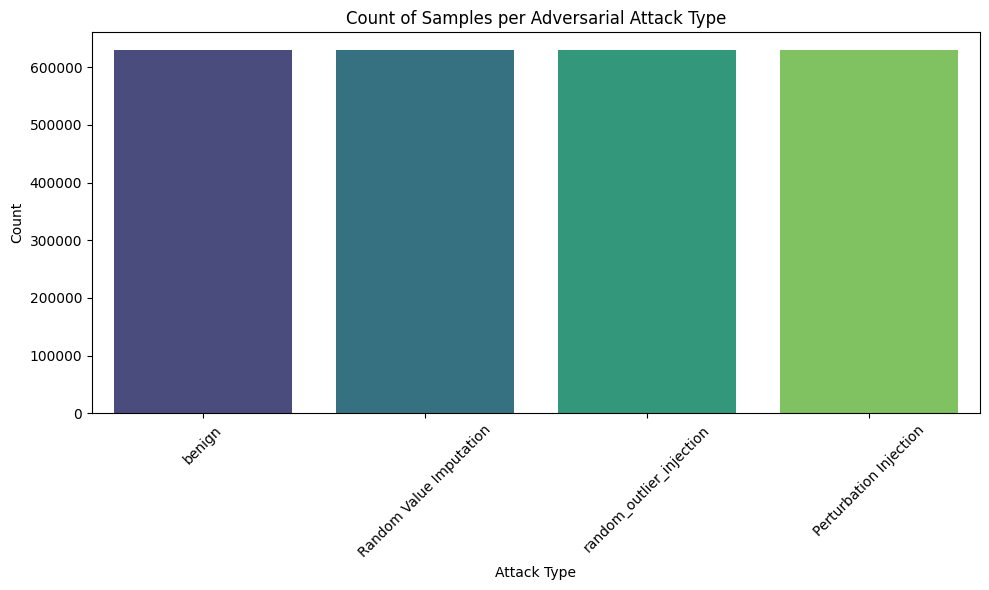

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df_merged, x='adversarial', palette='viridis')

plt.title("Count of Samples per Adversarial Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


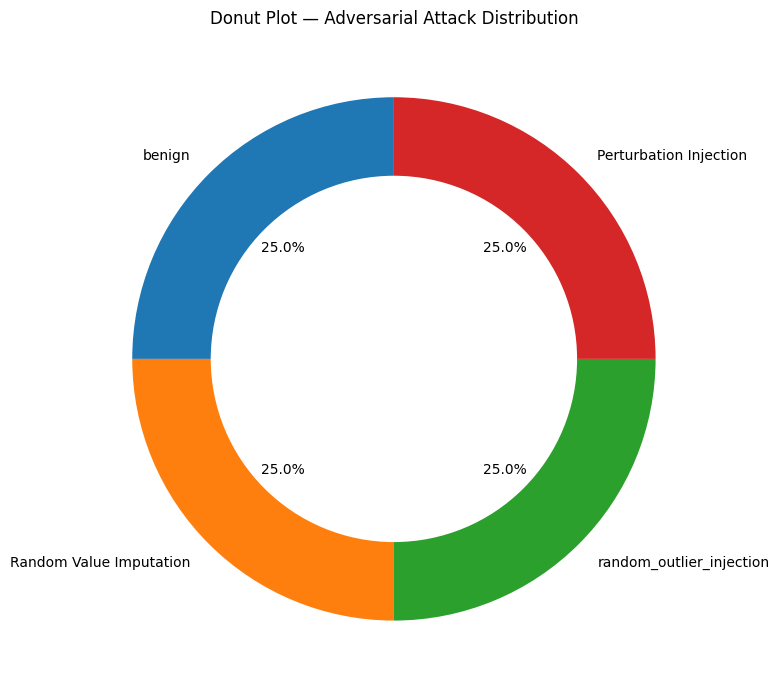

In [ ]:
import matplotlib.pyplot as plt

# Count samples per attack type
attack_counts = df_merged['adversarial'].value_counts()

# Donut plot
plt.figure(figsize=(8,8))

# Outer ring (pie)
plt.pie(
    attack_counts,
    labels=attack_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.35}   # Creates the "donut" hole
)

# Draw center circle
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Donut Plot — Adversarial Attack Distribution")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for column in data.columns:
    # Check if the column dtype is 'object'
    if data[column].dtype == 'object':
        # Encode the values of the column and replace them in the DataFrame
        data[column] = label_encoder.fit_transform(data[column])

# Now all object columns are encoded as integers

In [ ]:
data.tail()

Timestamp   Source Port   Min Packet Length  \
2515494  11521.065120  49768.020221          320.998197   
2515495  24244.013849  55084.933464          382.934926   
2515496  25697.909233  59547.986301          321.970640   
2515497  19613.052135  41954.943099          329.987757   
2515498  11763.067422  35246.906036          382.983173   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
2515494              321.048318  144551.956009           344.145930   
2515495              382.949404  174891.059322           382.960547   
2515496              321.901266  222773.088229           339.345978   
2515497              329.909712  104088.053041           345.547709   
2515498              383.081175   73617.929628           383.092707   

          Fwd Packet Length Max   Average Packet Size   ACK Flag Count  \
2515494              392.927402            401.413112        -0.065631   
2515495              383.034605            574.434533        -0.061259   
2515496              373.990491            395.922827         0.074407   
2515497              369.097404            432.057076         0.012430   
2515498              382.912350            574.533634        -0.000006   

          Avg Fwd Segment Size  ...   Max Packet Length   Protocol  \
2515494             347.979328  ...          392.935427  17.043325   
2515495             383.072995  ...          383.030108  17.042599   
2515496             342.382244  ...          373.939355  17.099210   
2515497             349.496525  ...          368.948946  16.920943   
2515498             383.097978  ...          383.049346  17.081694   

         Fwd Packets/s   Flow Packets/s  Total Length of Fwd Packets  \
2515494   2.820368e+01     2.810947e+01                  2087.941897   
2515495   9.999999e+05     9.999999e+05                   765.905130   
2515496   2.536701e+01     2.544963e+01                  2054.004789   
2515497   3.674684e+01     3.675414e+01                  1397.955869   
2515498   2.000000e+06     2.000000e+06                   766.099374   

          Subflow Fwd Bytes   Destination Port   act_data_pkt_fwd     Label  \
2515494         2088.030004       28890.056626           5.000242  7.045179   
2515495          765.901687        4260.056844           1.082994  7.029690   
2515496         2054.034322       32513.972738           5.063402  7.094390   
2515497         1397.921485       50492.981687           2.997595  7.027414   
2515498          766.014151        8390.029315           0.934460  6.957646   

         adversarial  
2515494            0  
2515495            0  
2515496            0  
2515497            0  
2515498            0  

[5 rows x 22 columns]

In [ ]:
data.shape

(2515499, 22)

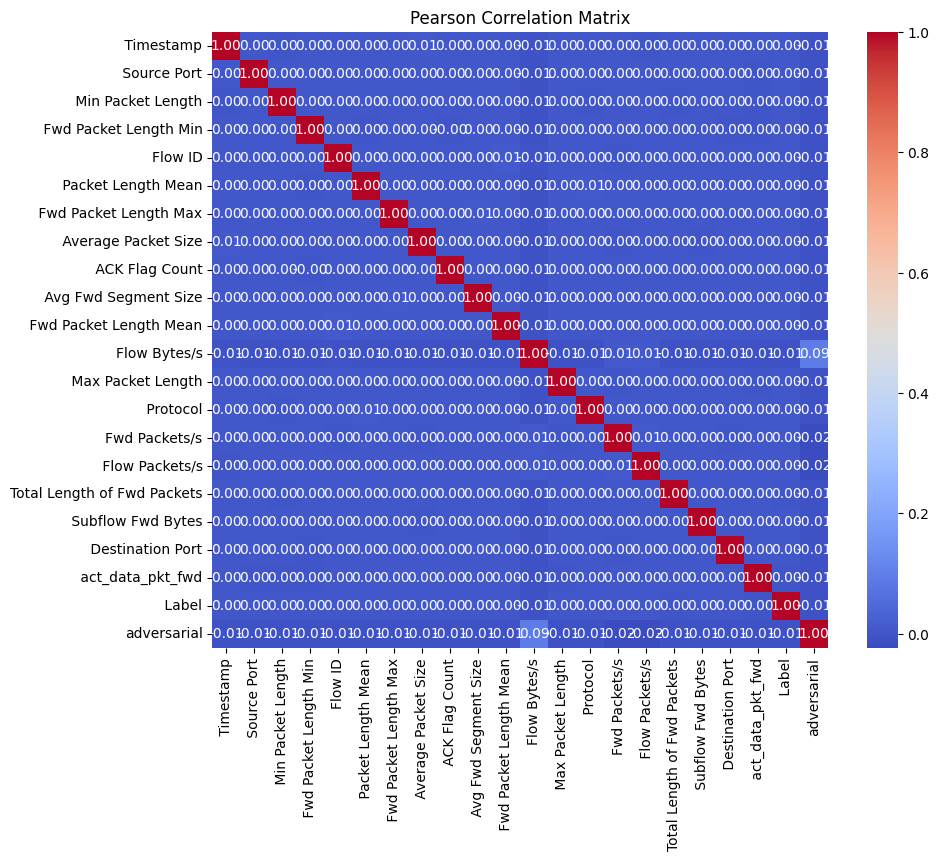

In [ ]:
import seaborn as sns
# Create DataFrame
df = pd.DataFrame(data)


# Calculate Pearson correlation
correlation_matrix = df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Pearson Correlation Matrix')
plt.show()


In [ ]:
# Identify highly correlated features
threshold = 0.8  # Define threshold for high correlation
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features to remove:", highly_correlated_features)

# Remove highly correlated features
df_cleaned = df.drop(columns=highly_correlated_features)

print("\nDataFrame after removing highly correlated features:")
print(df_cleaned)

Highly correlated features to remove: set()

DataFrame after removing highly correlated features:
            Timestamp   Source Port   Min Packet Length  \
0        16489.000000  42877.000000          375.000000   
1        25361.000000  50957.000000          330.000000   
2          451.000000    661.000000         1472.000000   
3         3308.000000  33922.000000          375.000000   
4        35122.000000  40276.000000          401.000000   
...               ...           ...                 ...   
2515494  11521.065120  49768.020221          320.998197   
2515495  24244.013849  55084.933464          382.934926   
2515496  25697.909233  59547.986301          321.970640   
2515497  19613.052135  41954.943099          329.987757   
2515498  11763.067422  35246.906036          382.983173   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
0                    375.000000  108220.000000           375.000000   
1                    330.000000  150843.000000     

In [ ]:
df_cleaned.shape

(2515499, 22)

In [ ]:
df_cleaned.head()

Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
0     16489.0       42877.0               375.0                   375.0   
1     25361.0       50957.0               330.0                   330.0   
2       451.0         661.0              1472.0                  1472.0   
3      3308.0       33922.0               375.0                   375.0   
4     35122.0       40276.0               401.0                   401.0   

    Flow ID   Packet Length Mean   Fwd Packet Length Max  \
0  108220.0                375.0                   375.0   
1  150843.0                353.6                   389.0   
2  397980.0               1472.0                  1472.0   
3   67832.0                375.0                   375.0   
4   96408.0                401.0                   401.0   

    Average Packet Size   ACK Flag Count   Avg Fwd Segment Size  ...  \
0                 562.5              0.0                  375.0  ...   
1                 442.0              0.0                  359.5  ...   
2                2208.0              0.0                 1472.0  ...   
3                 562.5              0.0                  375.0  ...   
4                 601.5              0.0                  401.0  ...   

    Max Packet Length   Protocol  Fwd Packets/s   Flow Packets/s  \
0               375.0       17.0   1.000000e+06     1.000000e+06   
1               389.0       17.0   3.784152e+01     3.784152e+01   
2              1472.0       17.0   1.000000e+06     1.000000e+06   
3               375.0       17.0   2.000000e+06     2.000000e+06   
4               401.0       17.0   2.000000e+06     2.000000e+06   

   Total Length of Fwd Packets   Subflow Fwd Bytes   Destination Port  \
0                        750.0               750.0            32700.0   
1                       1438.0              1438.0            19129.0   
2                       2944.0              2944.0            43938.0   
3                        750.0               750.0            26422.0   
4                        802.0               802.0            57759.0   

    act_data_pkt_fwd   Label  adversarial  
0                1.0     7.0            2  
1                3.0     7.0            2  
2                1.0     7.0            2  
3                1.0     7.0            2  
4                1.0     7.0            2  

[5 rows x 22 columns]

In [ ]:
X = df_cleaned.drop("adversarial", axis=1)
y = df_cleaned["adversarial"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
num_classes = len(label_encoder.classes_)
print(num_classes)

4


In [ ]:
X

Timestamp   Source Port   Min Packet Length  \
0        16489.000000  42877.000000          375.000000   
1        25361.000000  50957.000000          330.000000   
2          451.000000    661.000000         1472.000000   
3         3308.000000  33922.000000          375.000000   
4        35122.000000  40276.000000          401.000000   
...               ...           ...                 ...   
2515494  11521.065120  49768.020221          320.998197   
2515495  24244.013849  55084.933464          382.934926   
2515496  25697.909233  59547.986301          321.970640   
2515497  19613.052135  41954.943099          329.987757   
2515498  11763.067422  35246.906036          382.983173   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
0                    375.000000  108220.000000           375.000000   
1                    330.000000  150843.000000           353.600000   
2                   1472.000000  397980.000000          1472.000000   
3                    375.000000   67832.000000           375.000000   
4                    401.000000   96408.000000           401.000000   
...                         ...            ...                  ...   
2515494              321.048318  144551.956009           344.145930   
2515495              382.949404  174891.059322           382.960547   
2515496              321.901266  222773.088229           339.345978   
2515497              329.909712  104088.053041           345.547709   
2515498              383.081175   73617.929628           383.092707   

          Fwd Packet Length Max   Average Packet Size   ACK Flag Count  \
0                    375.000000            562.500000         0.000000   
1                    389.000000            442.000000         0.000000   
2                   1472.000000           2208.000000         0.000000   
3                    375.000000            562.500000         0.000000   
4                    401.000000            601.500000         0.000000   
...                         ...                   ...              ...   
2515494              392.927402            401.413112        -0.065631   
2515495              383.034605            574.434533        -0.061259   
2515496              373.990491            395.922827         0.074407   
2515497              369.097404            432.057076         0.012430   
2515498              382.912350            574.533634        -0.000006   

          Avg Fwd Segment Size  ...  Flow Bytes/s   Max Packet Length  \
0                   375.000000  ...  3.750000e+08          375.000000   
1                   359.500000  ...  1.360403e+04          389.000000   
2                  1472.000000  ...  1.472000e+09         1472.000000   
3                   375.000000  ...  7.500000e+08          375.000000   
4                   401.000000  ...  8.020000e+08          401.000000   
...                        ...  ...           ...                 ...   
2515494             347.979328  ...  9.798498e+03          392.935427   
2515495             383.072995  ...  3.830000e+08          383.030108   
2515496             342.382244  ...  8.709774e+03          373.939355   
2515497             349.496525  ...  1.281123e+04          368.948946   
2515498             383.097978  ...  7.660000e+08          383.049346   

          Protocol  Fwd Packets/s   Flow Packets/s  \
0        17.000000   1.000000e+06     1.000000e+06   
1        17.000000   3.784152e+01     3.784152e+01   
2        17.000000   1.000000e+06     1.000000e+06   
3        17.000000   2.000000e+06     2.000000e+06   
4        17.000000   2.000000e+06     2.000000e+06   
...            ...            ...              ...   
2515494  17.043325   2.820368e+01     2.810947e+01   
2515495  17.042599   9.999999e+05     9.999999e+05   
2515496  17.099210   2.536701e+01     2.544963e+01   
2515497  16.920943   3.674684e+01     3.675414e+01   
2515498  17.081694   2.000000e+06     2.000000e+06   

         Total Length of Fwd Packet

In [ ]:
df_cleaned.head()

Timestamp   Source Port   Min Packet Length   Fwd Packet Length Min  \
0     16489.0       42877.0               375.0                   375.0   
1     25361.0       50957.0               330.0                   330.0   
2       451.0         661.0              1472.0                  1472.0   
3      3308.0       33922.0               375.0                   375.0   
4     35122.0       40276.0               401.0                   401.0   

    Flow ID   Packet Length Mean   Fwd Packet Length Max  \
0  108220.0                375.0                   375.0   
1  150843.0                353.6                   389.0   
2  397980.0               1472.0                  1472.0   
3   67832.0                375.0                   375.0   
4   96408.0                401.0                   401.0   

    Average Packet Size   ACK Flag Count   Avg Fwd Segment Size  ...  \
0                 562.5              0.0                  375.0  ...   
1                 442.0              0.0                  359.5  ...   
2                2208.0              0.0                 1472.0  ...   
3                 562.5              0.0                  375.0  ...   
4                 601.5              0.0                  401.0  ...   

    Max Packet Length   Protocol  Fwd Packets/s   Flow Packets/s  \
0               375.0       17.0   1.000000e+06     1.000000e+06   
1               389.0       17.0   3.784152e+01     3.784152e+01   
2              1472.0       17.0   1.000000e+06     1.000000e+06   
3               375.0       17.0   2.000000e+06     2.000000e+06   
4               401.0       17.0   2.000000e+06     2.000000e+06   

   Total Length of Fwd Packets   Subflow Fwd Bytes   Destination Port  \
0                        750.0               750.0            32700.0   
1                       1438.0              1438.0            19129.0   
2                       2944.0              2944.0            43938.0   
3                        750.0               750.0            26422.0   
4                        802.0               802.0            57759.0   

    act_data_pkt_fwd   Label  adversarial  
0                1.0     7.0            2  
1                3.0     7.0            2  
2                1.0     7.0            2  
3                1.0     7.0            2  
4                1.0     7.0            2  

[5 rows x 22 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
X_train

Timestamp   Source Port   Min Packet Length  \
2145069  166395.962050  61850.067499          404.979616   
1998285  303091.983096  19761.004360          477.992392   
1402257  771505.000000    568.000000         1472.000000   
368794   418191.000000  62527.000000          516.000000   
1745401   95516.000000  41225.000000            0.000000   
...                ...           ...                 ...   
110268   159811.000000  22628.000000            0.000000   
1692743   14735.000000  39264.000000          383.000000   
2356330  616293.054872  48052.962756          482.931996   
2229084  256046.077781  34891.038633          660.000455   
2219110  305958.019923  41240.066591          681.923202   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
2145069              404.947156  438049.976661           404.955726   
1998285              478.078402   77895.014834           478.009979   
1402257             1472.000000  142211.000000          1472.000000   
368794               516.000000  303581.000000           516.000000   
1745401                0.000000   48505.000000             0.000000   
...                         ...            ...                  ...   
110268                 0.000000   35358.000000             0.000000   
1692743               -0.179975   41956.000000           383.000000   
2356330              483.001386  290366.902717           483.022253   
2229084              660.097908  192164.088403           660.085730   
2219110              682.060296  239475.945369           681.903135   

          Fwd Packet Length Max   Average Packet Size   ACK Flag Count  \
2145069              404.949998            607.407206        -0.075339   
1998285              478.047042            716.985095        -0.070598   
1402257             1472.000000           2208.000000         0.000000   
368794               516.000000            645.000000         0.000000   
1745401                0.000000              0.000000         1.000000   
...                         ...                   ...              ...   
110268                 0.000000              0.000000         1.000000   
1692743              383.000000            574.500000         0.000000   
2356330              483.064109            724.431733        -0.036243   
2229084              660.030732            989.980630        -0.096184   
2219110              681.980950           1022.953401        -0.054408   

          Avg Fwd Segment Size  ...  Flow Bytes/s   Max Packet Length  \
2145069             405.066201  ...  8.100000e+08          404.963273   
1998285             477.963772  ...  9.560000e+08          478.005109   
1402257            1472.000000  ...  9.813333e+08         1472.000000   
368794              516.000000  ...  6.877870e+02          516.000000   
1745401               0.662112  ...  0.000000e+00            0.000000   
...                        ...  ...           ...                 ...   
110268                0.000000  ...  0.000000e+00            0.000000   
1692743               0.610976  ...  7.660000e+08           -0.803386   
2356330             482.923389  ...  4.830000e+08          482.926041   
2229084             659.974261  ...  1.320000e+09          659.992350   
2219110             682.023892  ...  1.364000e+09          681.930419   

          Protocol  Fwd Packets/s   Flow Packets/s  \
2145069  16.928444   2.000000e+06     2.000000e+06   
1998285  16.904413   2.000000e+06     2.000000e+06   
1402257  17.000000   6.666667e+05     6.666667e+05   
368794   17.000000   1.332921e+00     1.332921e+00   
1745401   6.000000   2.066677e-01     2.066677e-01   
...            ...            ...              ...   
110268    6.000000   2.000000e+06     2.000000e+06   
1692743  17.000000   2.000000e+06     8.164938e-01   
2356330  16.921728   1.000000e+06     1.000000e+06   
2229084  16.996425   2.000000e+06     2.000000e+06   
2219110  17.057926   2.000000e+06     2.000000e+06   

         Total Length of

In [ ]:
X_train.shape

(1760849, 21)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert the data to TensorFlow tensors
import tensorflow as tf
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.int32)
X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.int32)

In [ ]:
# Define the GNN model
class GNNModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(GNNModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(16, activation='relu')
        self.dense2 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return x

In [ ]:
# Create the GNN model
num_classes = len(label_encoder.classes_)
model = GNNModel(num_classes)

In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 18.1 MB/s eta 0:00:00


In [ ]:
# Define loss function and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
# Training loop
epochs = 5
batch_size = 32
steps_per_epoch = len(X_train_scaled) // batch_size

In [ ]:
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

In [ ]:
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size
        with tf.GradientTape() as tape:
            predictions = model(X_train_tensor[start:end])
            loss = loss_object(y_train_tensor[start:end], predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss = loss_object(y_train_tensor, model(X_train_tensor))
    test_loss = loss_object(y_test_tensor, model(X_test_tensor))
    train_loss_history.append(train_loss.numpy())
    test_loss_history.append(test_loss.numpy())

    y_pred_train = np.argmax(model(X_train_tensor).numpy(), axis=1)
    y_pred_test = np.argmax(model(X_test_tensor).numpy(), axis=1)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


In [ ]:
# Evaluation
y_pred_train_prob = model(X_train_tensor).numpy()
y_pred_test_prob = model(X_test_tensor).numpy()

# Convert probabilities to class indices
y_pred_train = np.argmax(y_pred_train_prob, axis=1)
y_pred_test = np.argmax(y_pred_test_prob, axis=1)

In [ ]:
from sklearn.metrics import f1_score
# F1 Score
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Accuracy
train_accuracy = np.mean(np.equal(y_train, y_pred_train))
test_accuracy = np.mean(np.equal(y_test, y_pred_test))

# Other metrics
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

# Accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train F1 Score: 0.8605886748174332
Test F1 Score: 0.8608280923539126
Train Accuracy: 0.8608597330037954
Test Accuracy: 0.8611144239051216


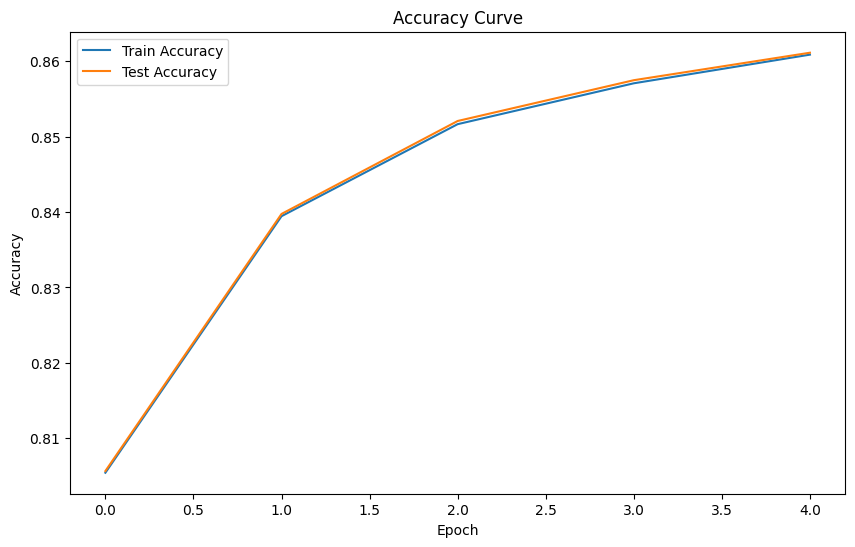

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_accuracy_history, label='Train Accuracy')
plt.plot(range(epochs), test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

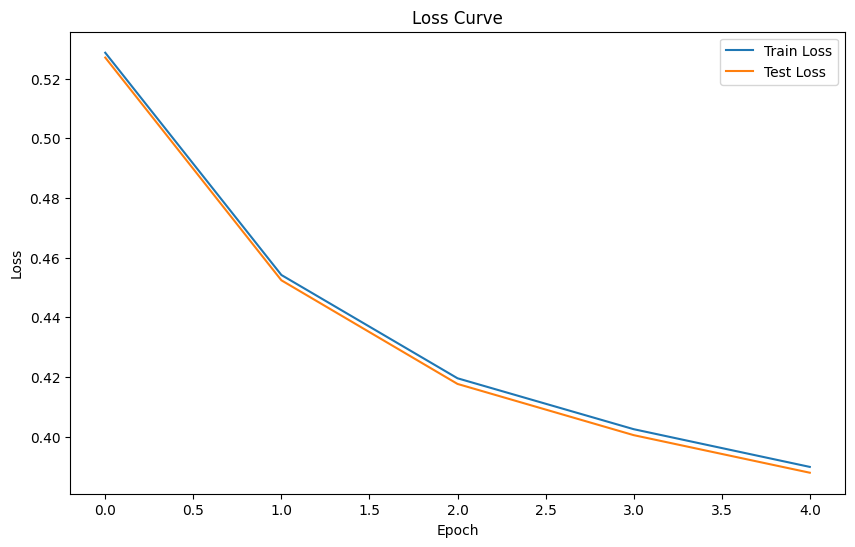

In [ ]:
# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Convert class labels to strings
class_labels_str = label_encoder.classes_.astype(str)

# Classification Report
report_train = classification_report(y_train, y_pred_train, target_names=class_labels_str)
report_test = classification_report(y_test, y_pred_test, target_names=class_labels_str)

# Display or print the classification reports
print("Classification Report - Train:")
print(report_train)

print("\nClassification Report - Test:")
print(report_test)


Classification Report - Train:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87    439490
           1       0.90      0.82      0.86    440787
           2       0.83      0.98      0.90    440057
           3       0.79      0.83      0.81    440515

    accuracy                           0.86   1760849
   macro avg       0.87      0.86      0.86   1760849
weighted avg       0.87      0.86      0.86   1760849


Classification Report - Test:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87    189384
           1       0.90      0.82      0.86    188087
           2       0.83      0.98      0.90    188820
           3       0.79      0.83      0.81    188359

    accuracy                           0.86    754650
   macro avg       0.87      0.86      0.86    754650
weighted avg       0.87      0.86      0.86    754650



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_train = roc_auc_score(y_train, y_pred_train_prob, multi_class='ovr')
roc_auc_test = roc_auc_score(y_test, y_pred_test_prob, multi_class='ovr')

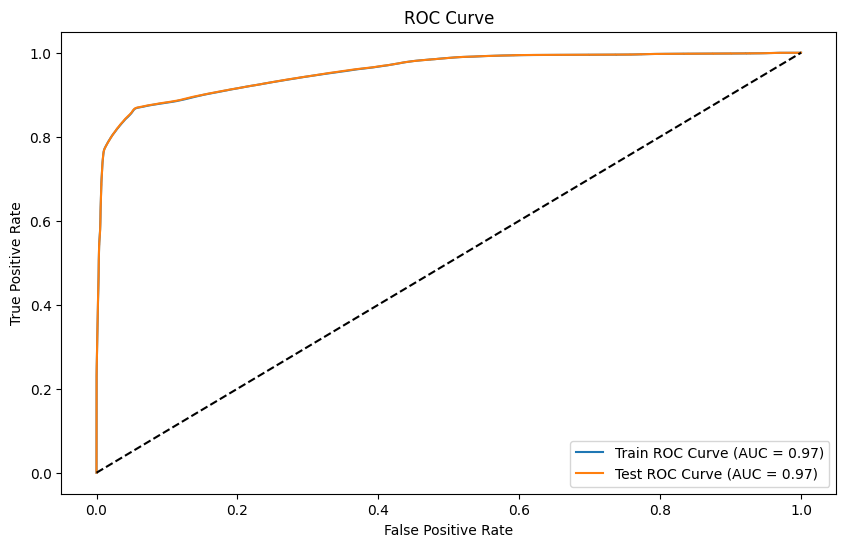

In [ ]:
from sklearn.metrics import roc_curve
# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_prob[:, 1], pos_label=1)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_prob[:, 1], pos_label=1)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


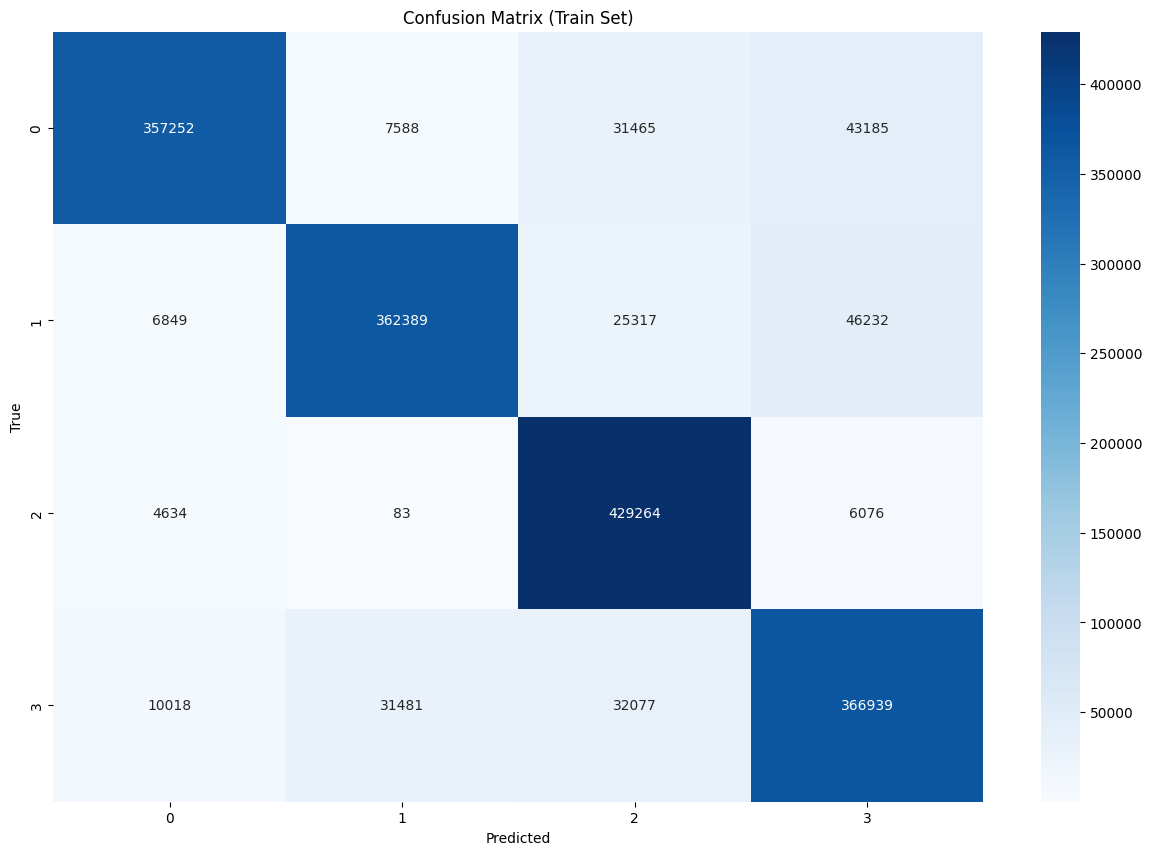

In [ ]:
# Plot Confusion Matrix Heatmap for Train Set
plt.figure(figsize=(15, 10))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Train Set)')
plt.show()

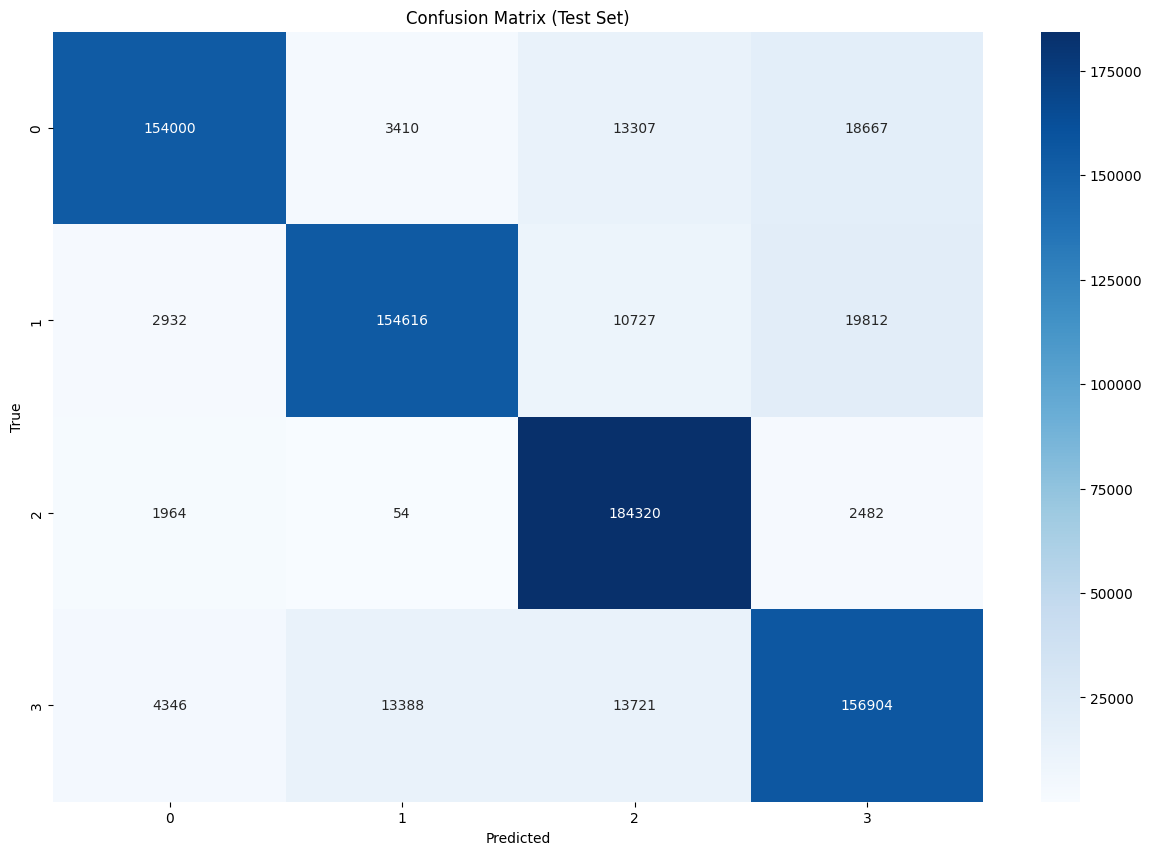

In [ ]:
# Plot Confusion Matrix Heatmap for Test Set
plt.figure(figsize=(15, 10))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [ ]:
import tensorflow as tf

class DeepFoolModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(DeepFoolModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation=None)  # No activation for logits

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return x


In [ ]:
# Create the LSTM model
num_classes = len(label_encoder.classes_)
model = DeepFoolModel(num_classes)  # Replace 'GNNModel' with the appropriate LSTM model class
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
epochs = 10
batch_size = 32
steps_per_epoch = len(X_train_scaled) // batch_size
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size
        with tf.GradientTape() as tape:
            predictions = model(X_train_tensor[start:end])
            loss = loss_object(y_train_tensor[start:end], predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss = loss_object(y_train_tensor, model(X_train_tensor))
    test_loss = loss_object(y_test_tensor, model(X_test_tensor))
    train_loss_history.append(train_loss.numpy())
    test_loss_history.append(test_loss.numpy())

    y_pred_train = np.argmax(model(X_train_tensor).numpy(), axis=1)
    y_pred_test = np.argmax(model(X_test_tensor).numpy(), axis=1)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
